In [1]:
# note run the data generator first.. this is only to handle the outputs of it.. 

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 15, 10

In [3]:
curves = pd.read_pickle("outputs/all_metrics.pickle")

In [4]:
def display(curves, model, chan=None):
    #sample sizes
    curves = curves.sort_values(by=["samples"])
    idx = curves["model.ident"] == model
    if not chan is None:
        idx = idx * (curves["chan"] == chan)
    
    if np.sum(idx) == 0:
        print "nothing matching"
        return 
    
    if True:
        train =  np.array(curves[idx]["train.support"].tolist())
        valid =  np.array(curves[idx]["valid.support"].tolist())
        
        plt.plot(curves[idx]["samples"], train[:,0], "o", label="train - false")
        plt.plot(curves[idx]["samples"], valid[:,0], "o", label="valid - false")
        plt.plot(curves[idx]["samples"], train[:,1], "o", label="train - true")
        plt.plot(curves[idx]["samples"], valid[:,1], "o", label="valid - true")
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.xscale("log")
        plt.title(model + " - sample sizes")
        plt.grid(True)
        plt.show()

    
    if True:
        train =  np.array(curves[idx]["train.support"].tolist())
        valid =  np.array(curves[idx]["valid.support"].tolist())
        totals_train = np.sum(train, axis=1)
        totals_valid = np.sum(valid, axis=1)
                
        plt.plot(curves[idx]["samples"], train[:,0].astype(np.float)/totals_train, "o", label="ratio train - false")
        plt.plot(curves[idx]["samples"], valid[:,0].astype(np.float)/totals_valid, "o", label="ratio valid - false")
        plt.plot(curves[idx]["samples"], train[:,1].astype(np.float)/totals_train, "o", label="ratio train - true")
        plt.plot(curves[idx]["samples"], valid[:,1].astype(np.float)/totals_valid, "o", label="ratio valid - true")
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.xscale("log")
        plt.title(model + " - sample sizes")
        plt.grid(True)
        plt.show()    
        
    measures = ["acc", "loss", "mse"]
    for m in measures:
        plt.plot(curves[idx]["samples"], curves[idx]["train." + m], "o", color="red",  label="train")
        plt.plot(curves[idx]["samples"], curves[idx]["valid." + m], "o", color="blue", label="valid")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.xscale("log")
        plt.title(model + " - " + m)
        plt.grid(True)
        plt.show()
    
    measures = ["recall", "prec", "fscore"]
    for m in measures:
        train =  np.array(curves[idx]["train." + m].tolist())
        valid =  np.array(curves[idx]["valid." + m].tolist())
        
        plt.plot(curves[idx]["samples"], train[:,0], "o", color="red",  label="train - false")
        plt.plot(curves[idx]["samples"], valid[:,0], "o", color="blue", label="valid - false")
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.xscale("log")
        plt.title(model + " - " + m + " - false")
        plt.grid(True)

        axes = plt.gca()
        axes.set_ylim([-0.05,1.05])
        plt.show()
        
        plt.plot(curves[idx]["samples"], train[:,1], "o", color="red",  label="train - true ")
        plt.plot(curves[idx]["samples"], valid[:,1], "o", color="blue", label="valid - true ")

        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.xscale("log")
        plt.title(model + " - " + m + " - true")
        plt.grid(True)

        axes = plt.gca()
        axes.set_ylim([-0.05,1.05])
        plt.show()

/usr/local/lib/python2.7/dist-packages/pandas/computation/expressions.py:182: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


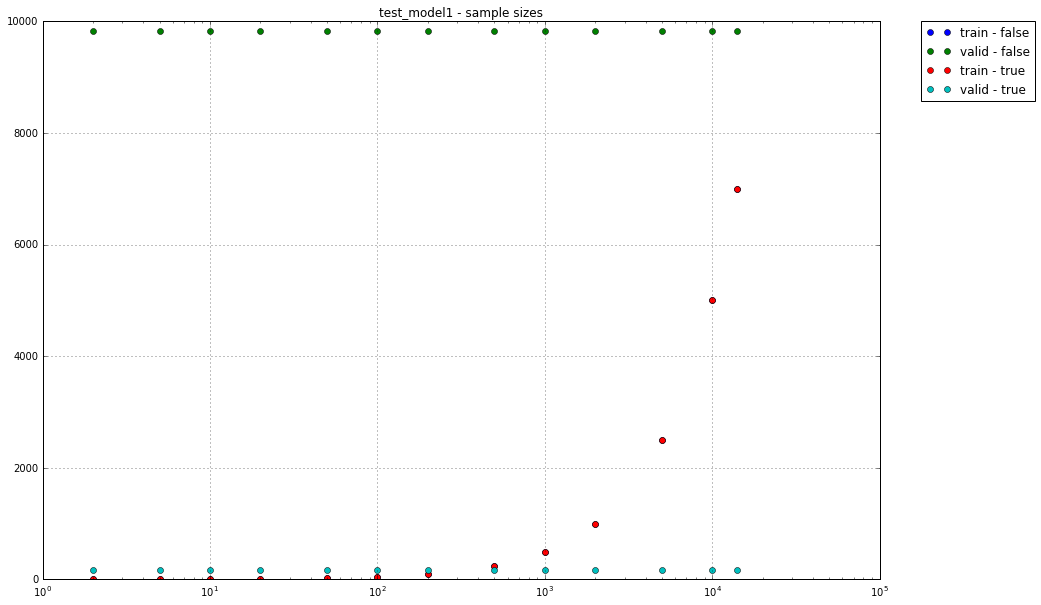

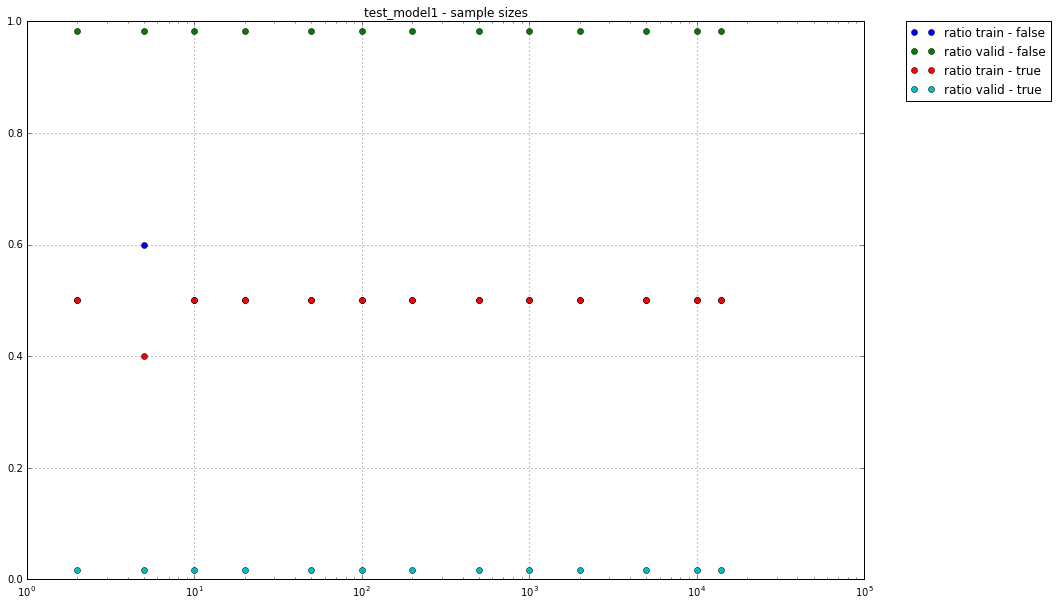

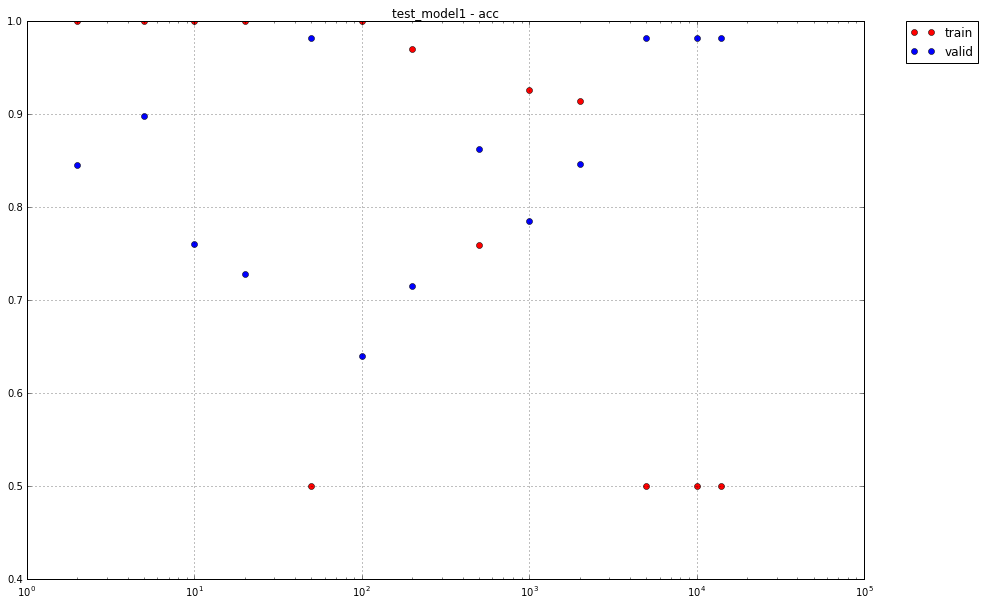

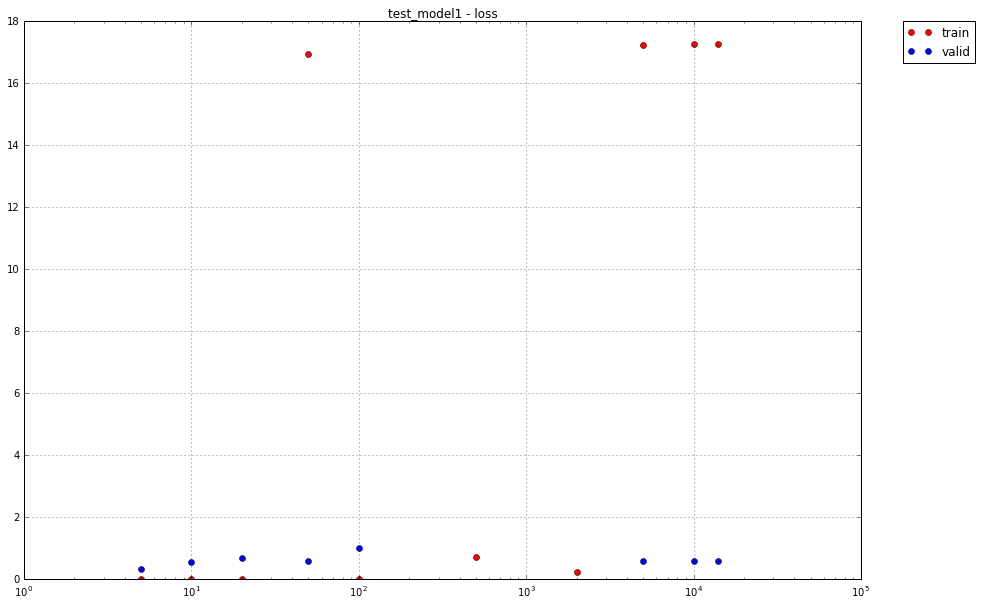

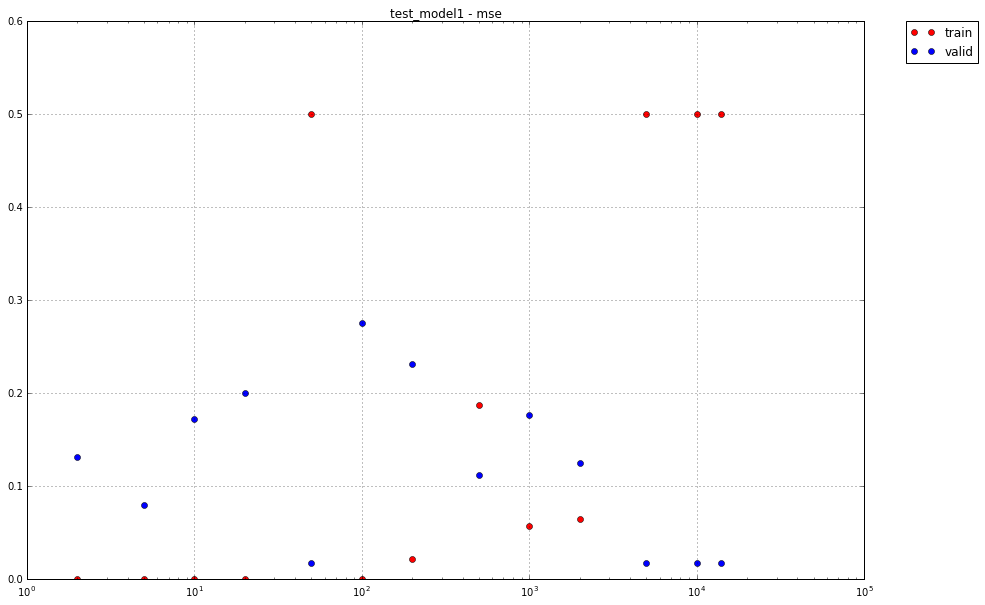

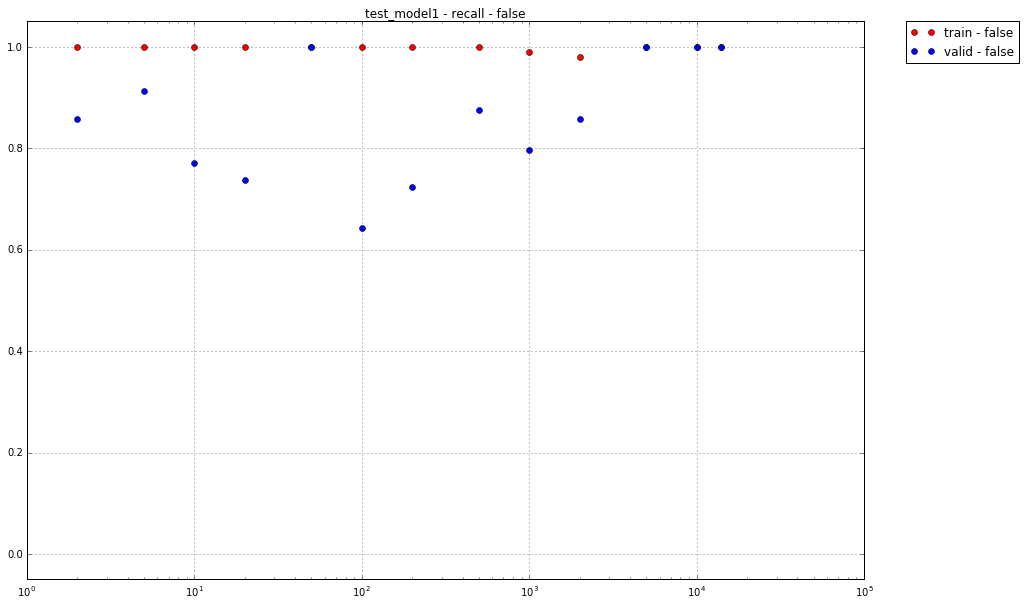

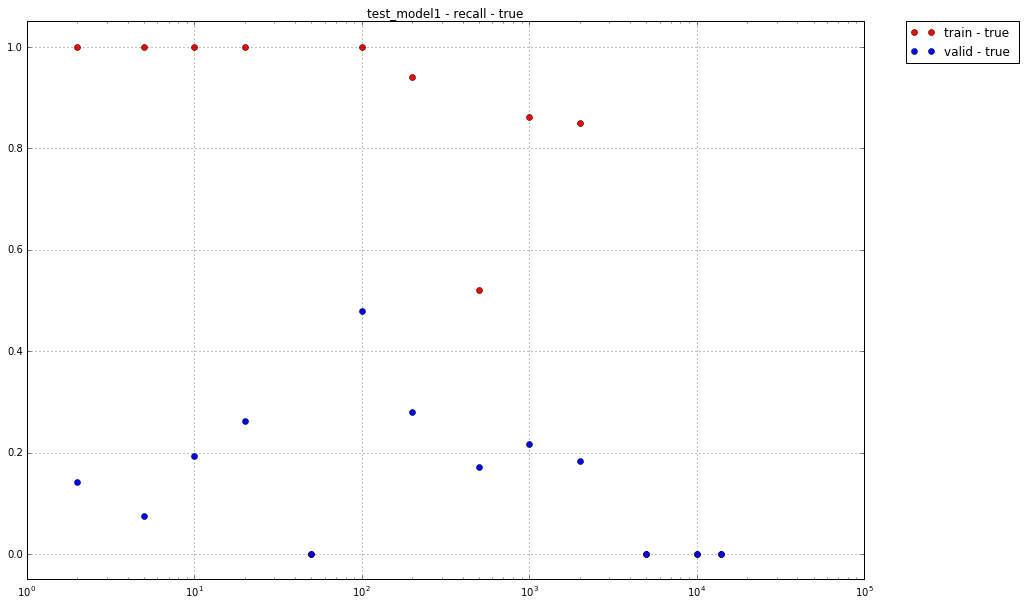

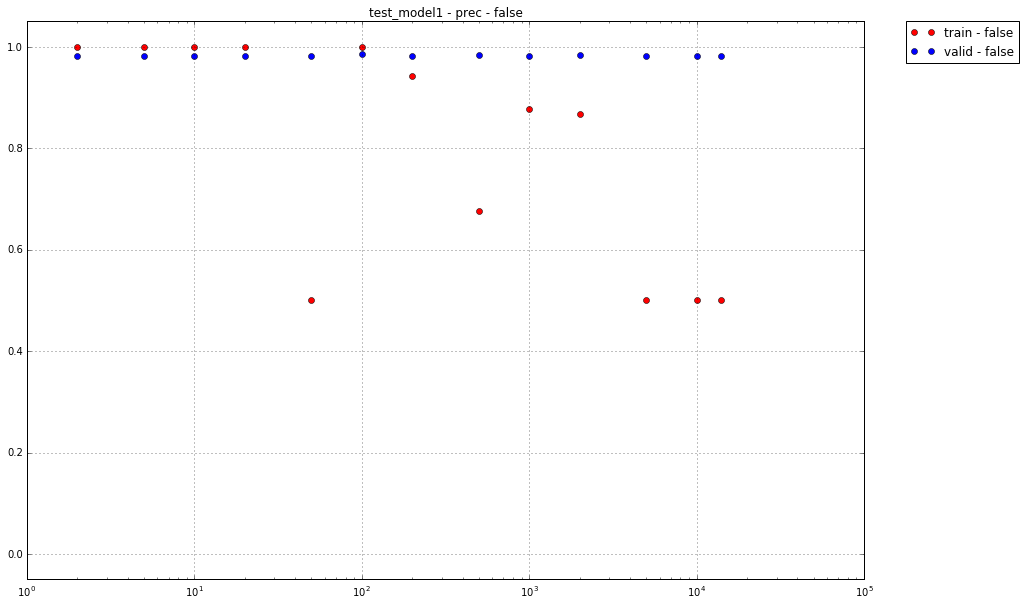

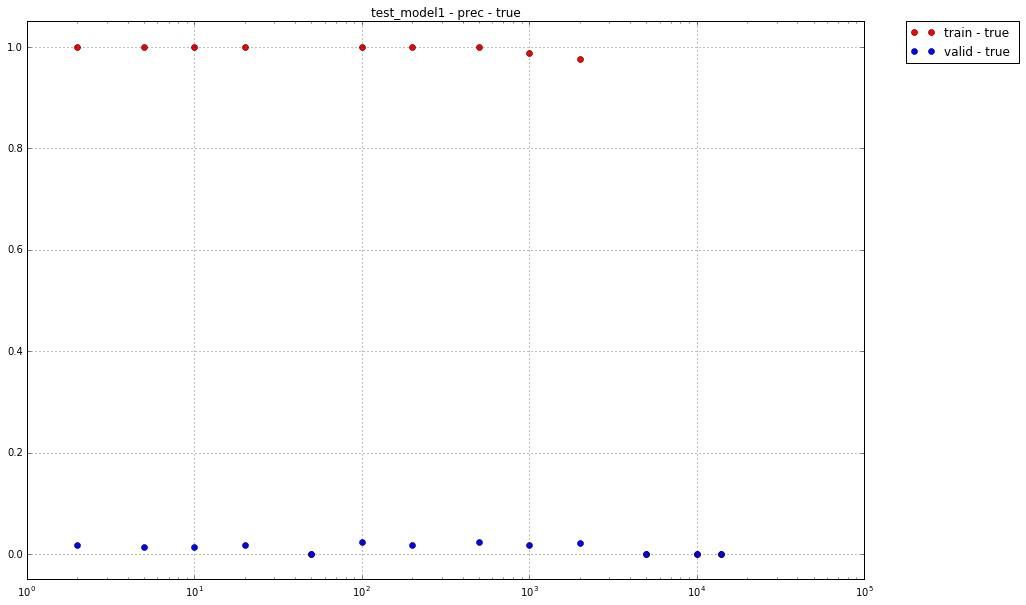

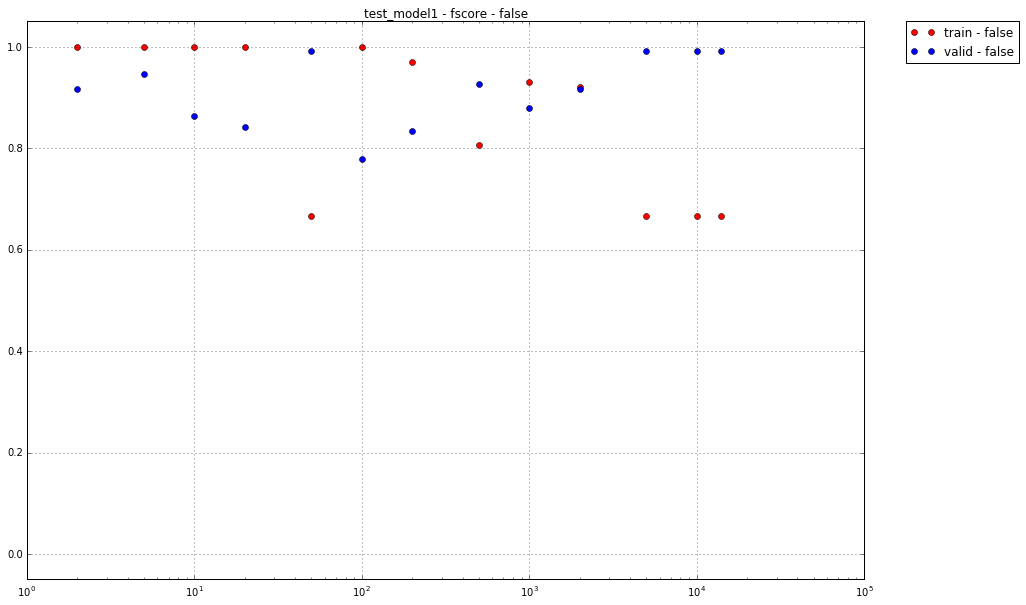

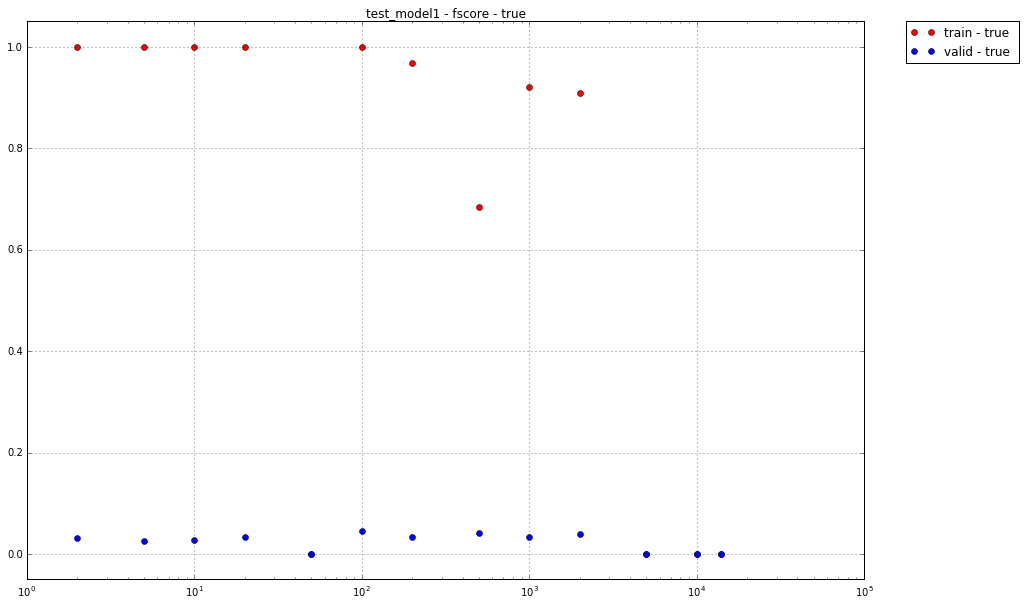

In [5]:
display(curves,"test_model1",chan=10)

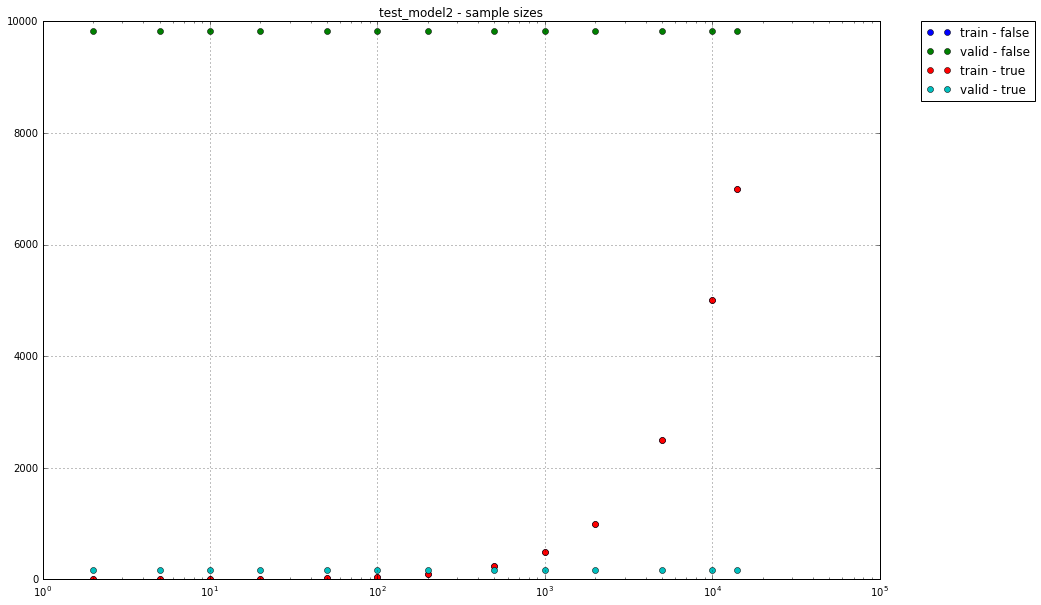

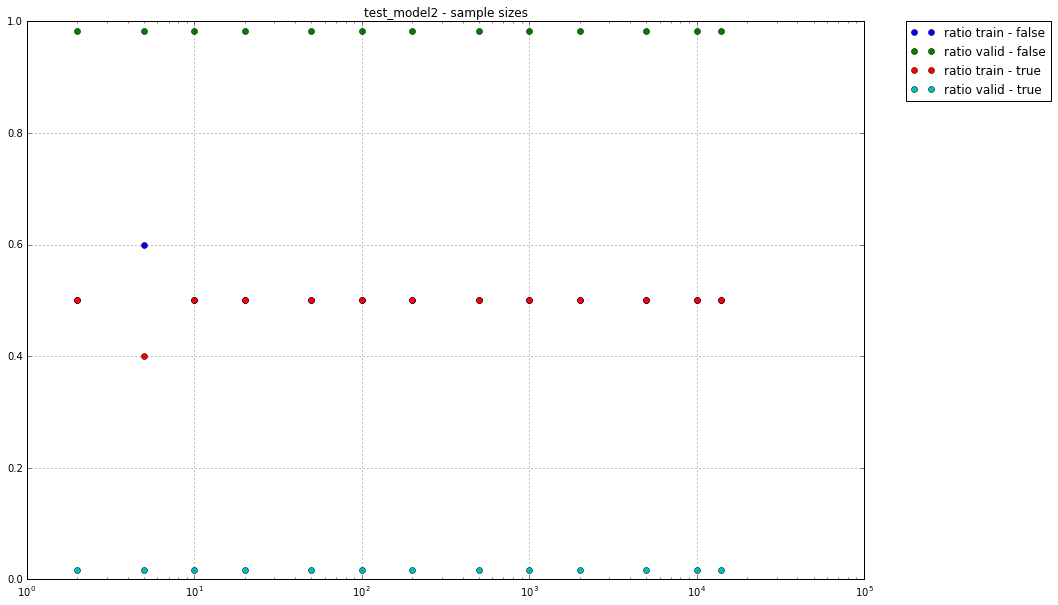

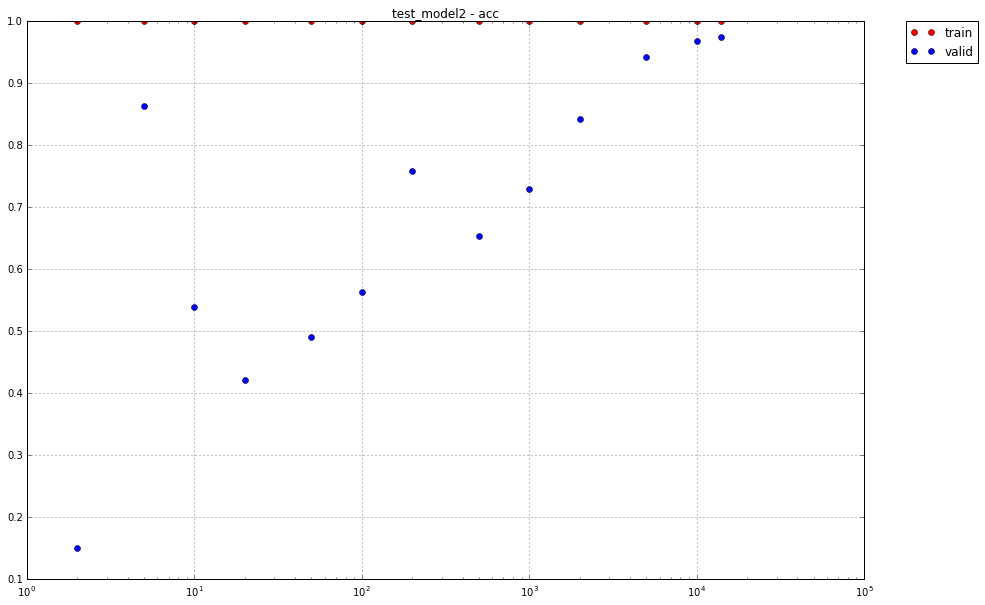

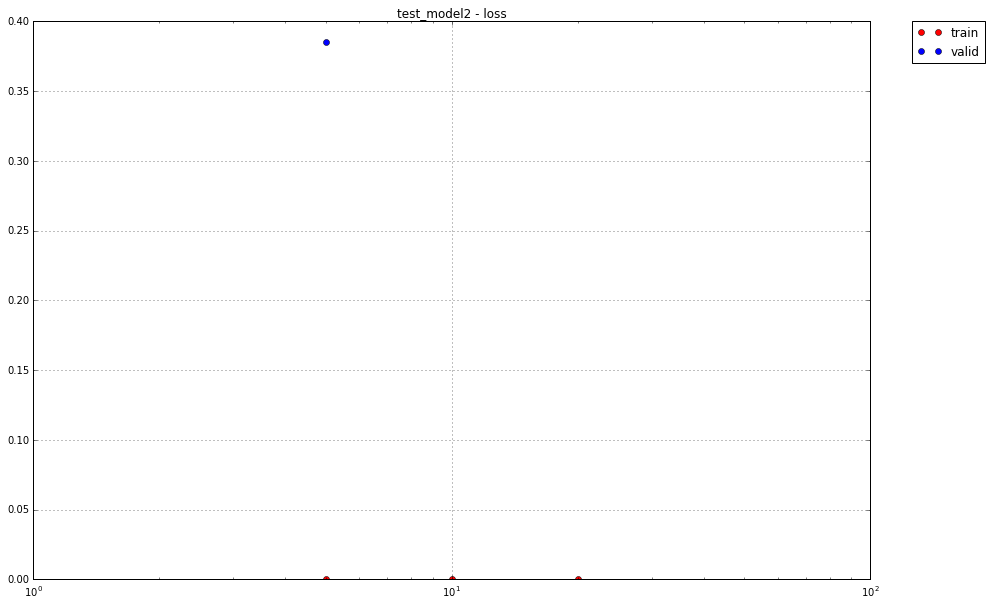

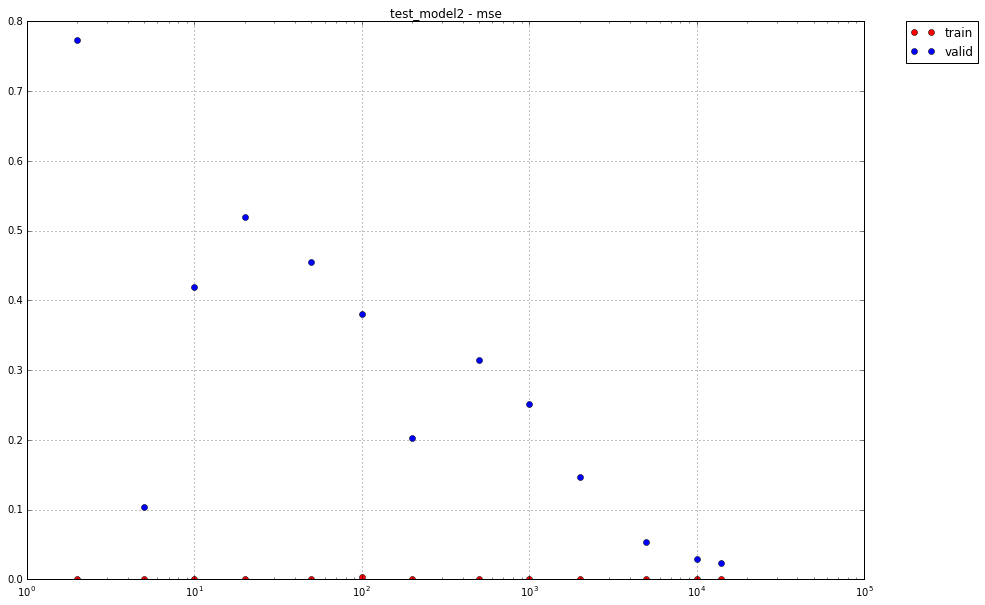

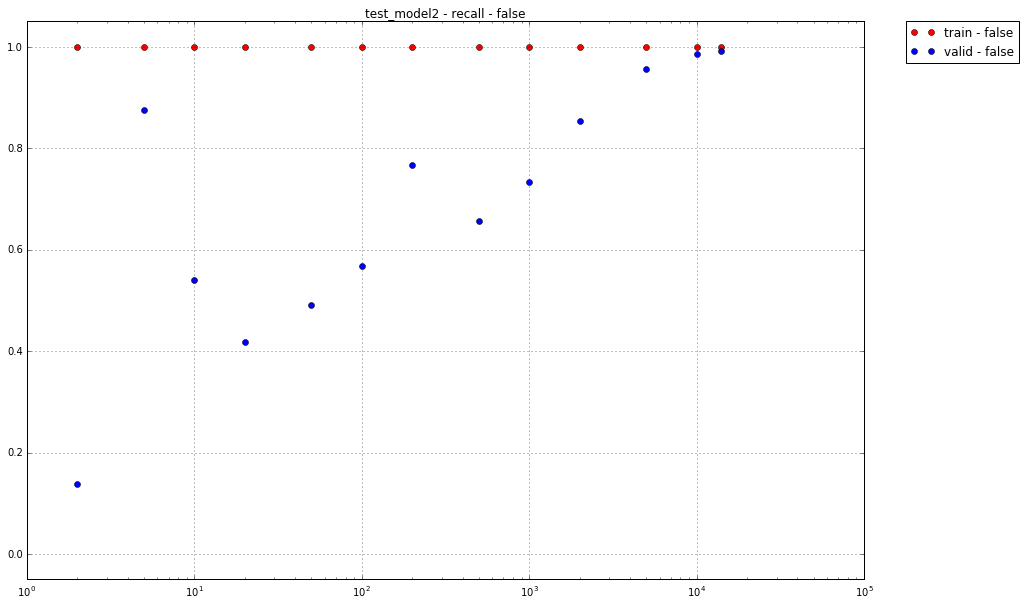

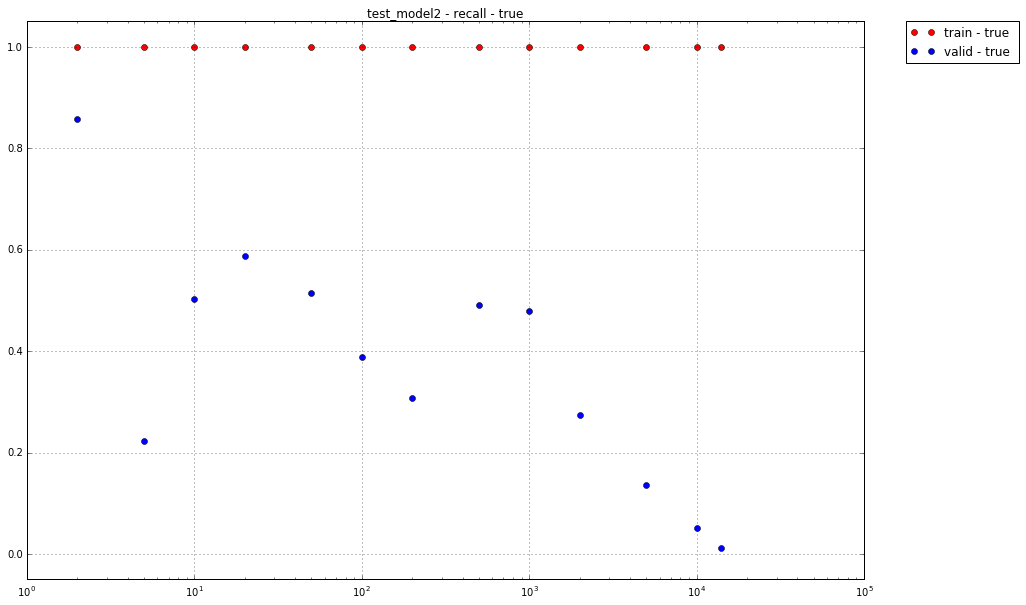

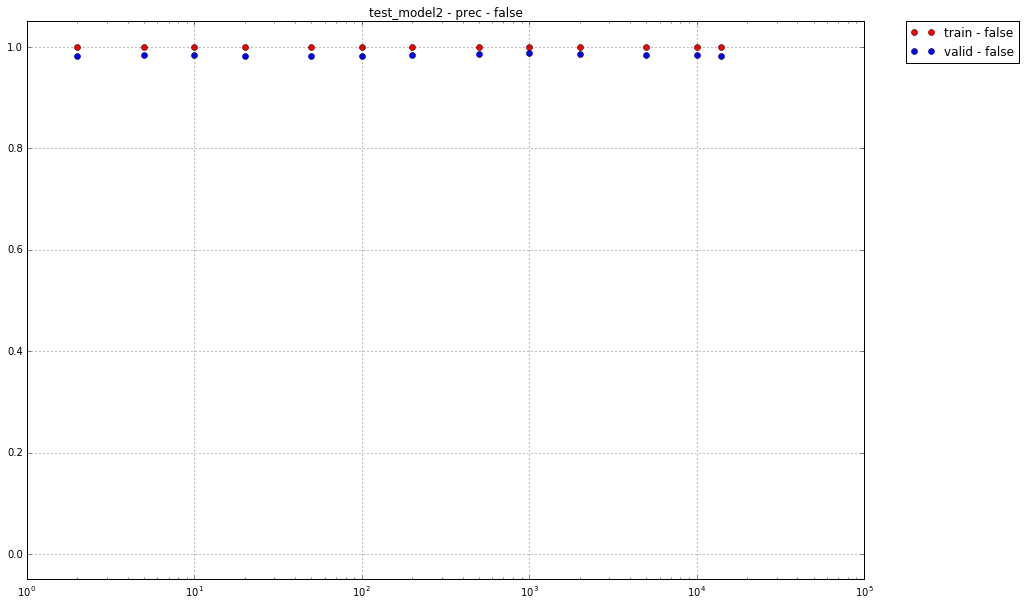

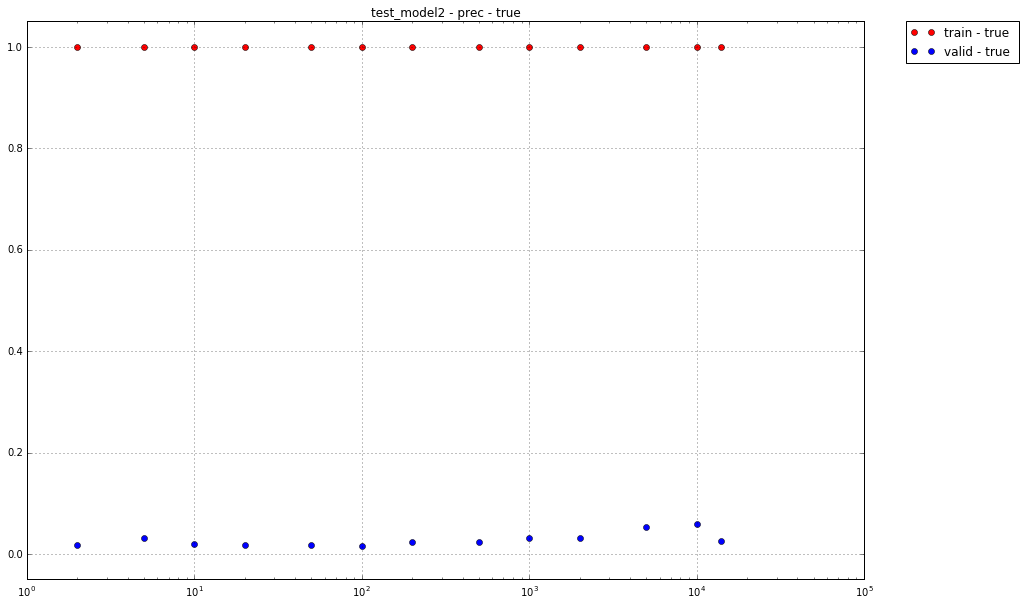

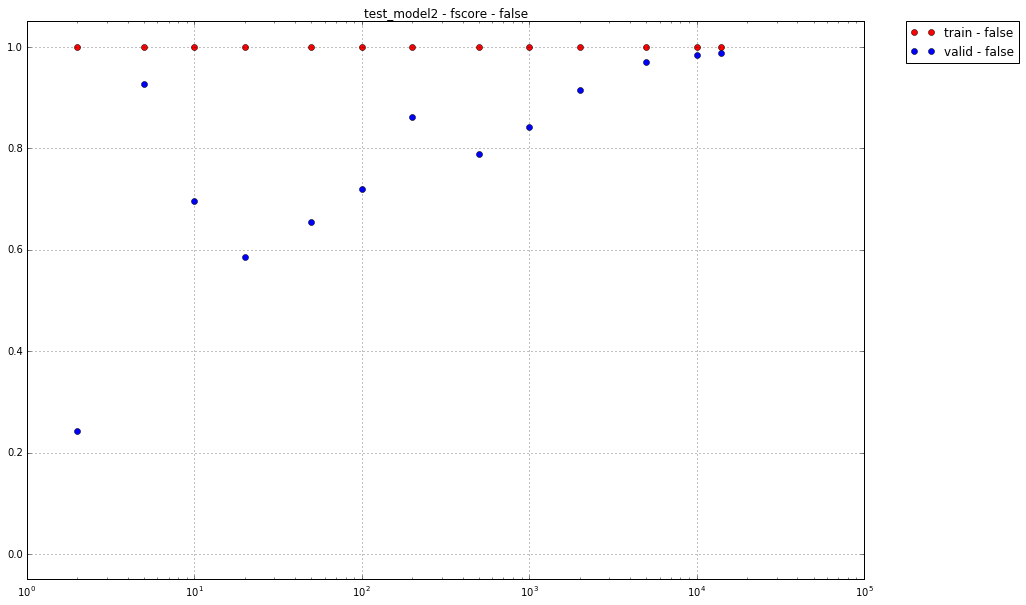

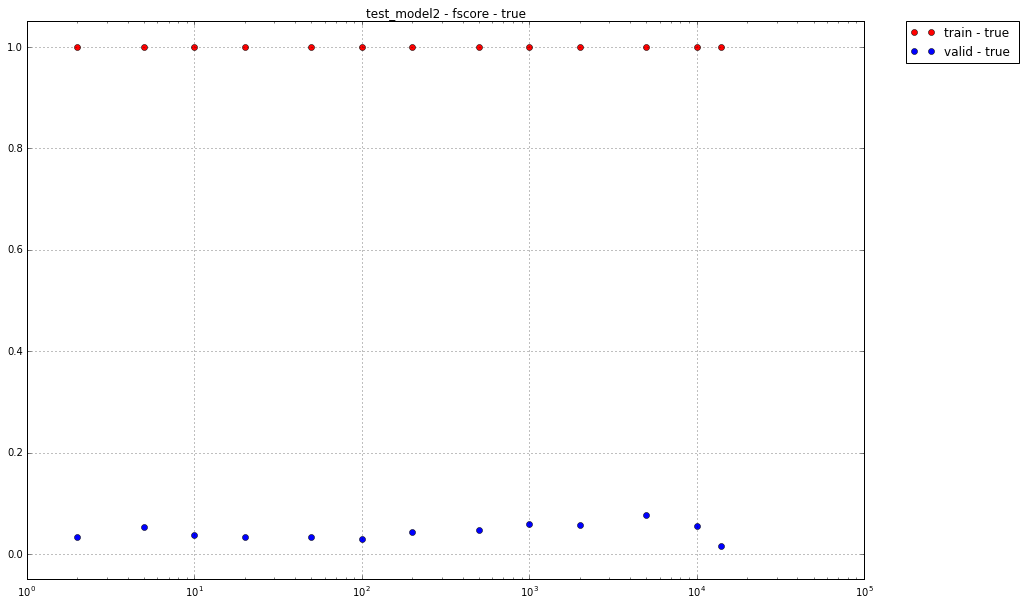

In [6]:
display(curves,"test_model2",chan=10)

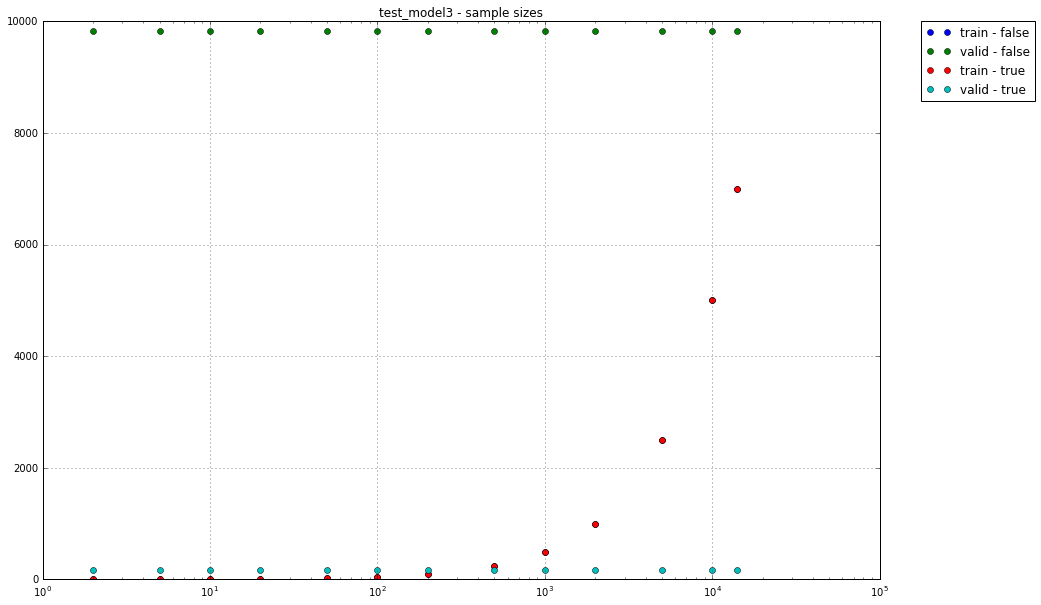

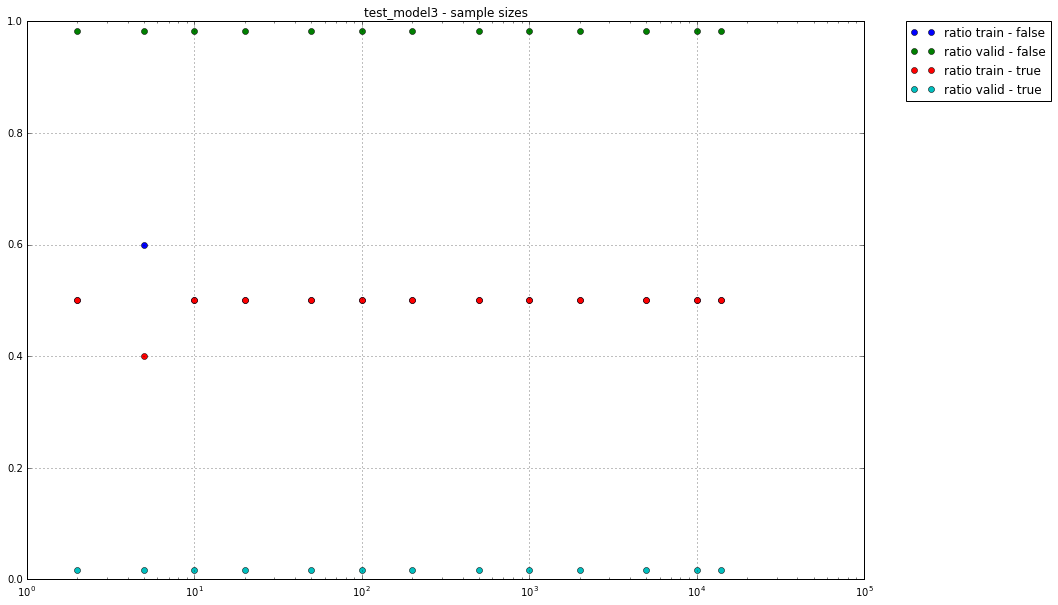

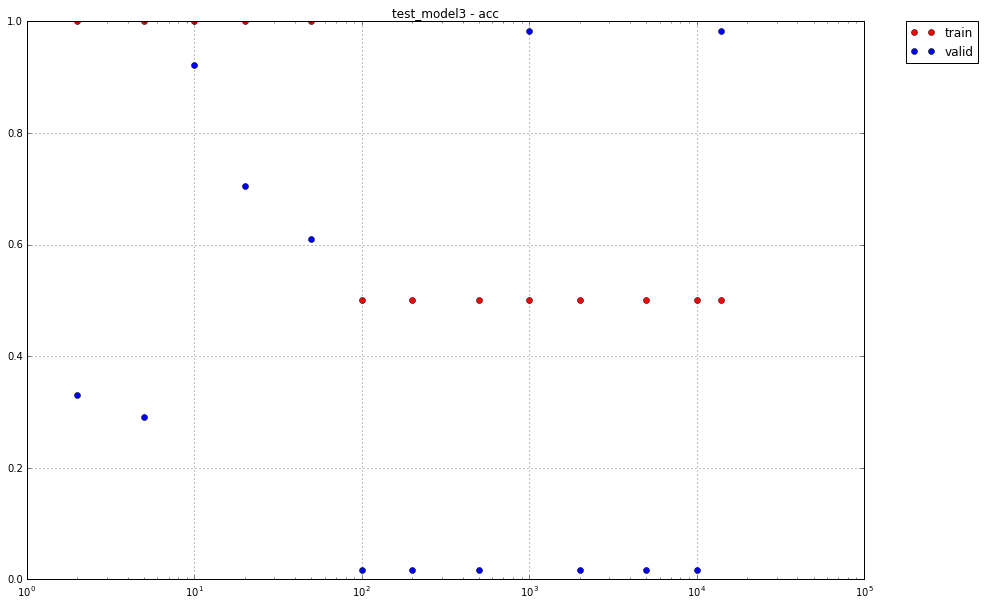

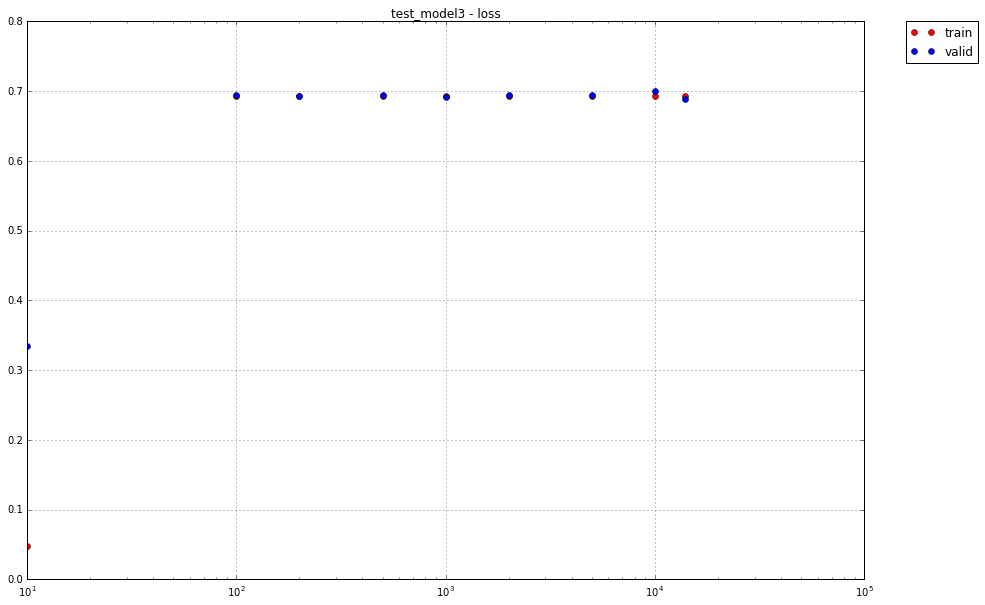

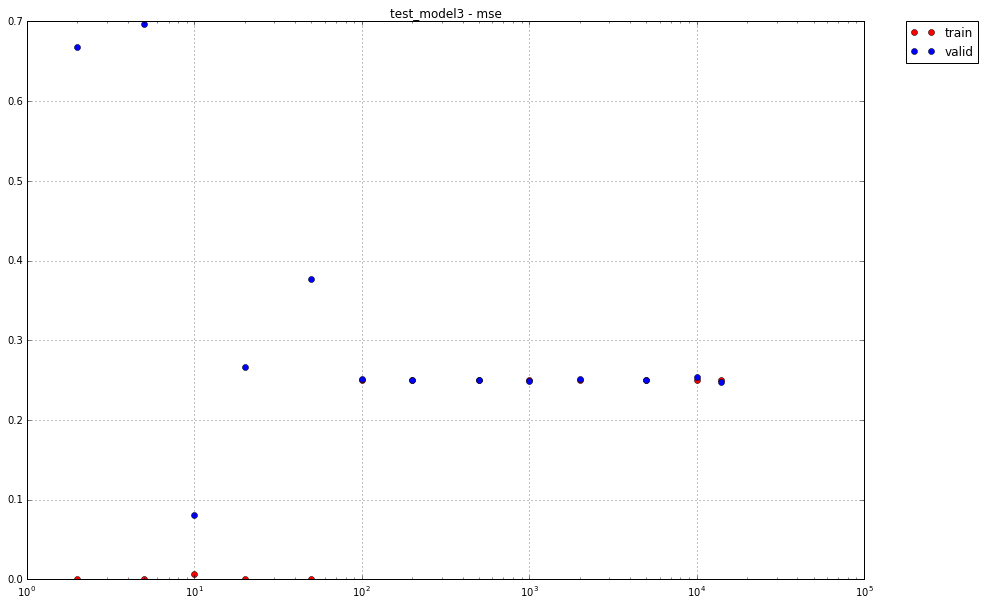

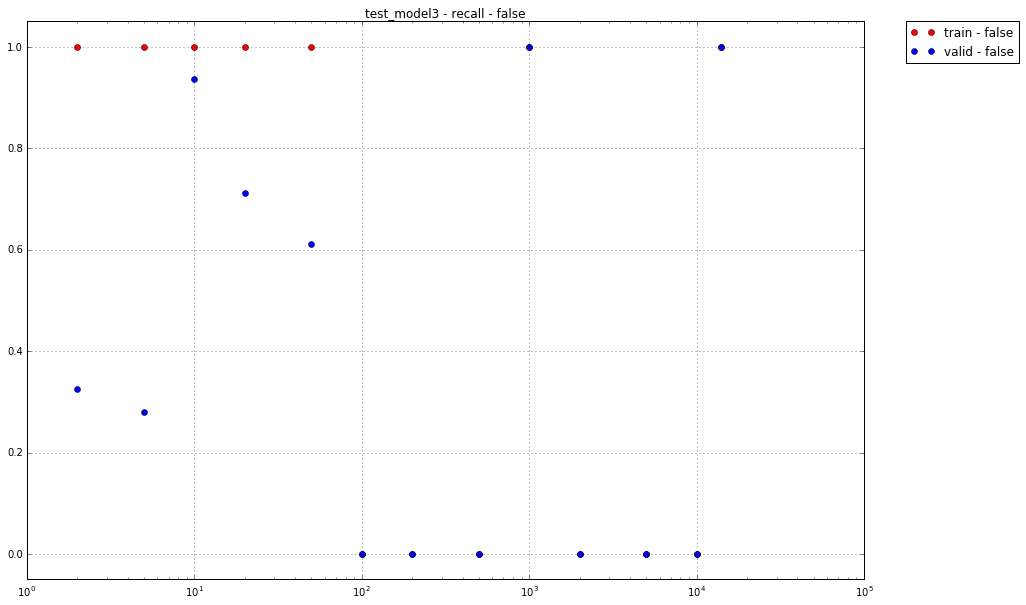

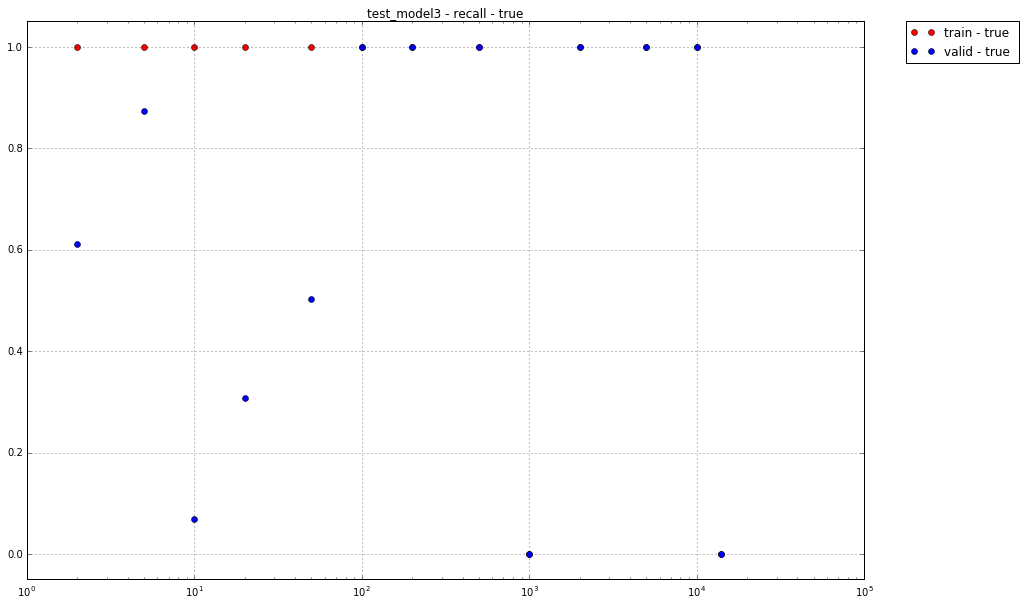

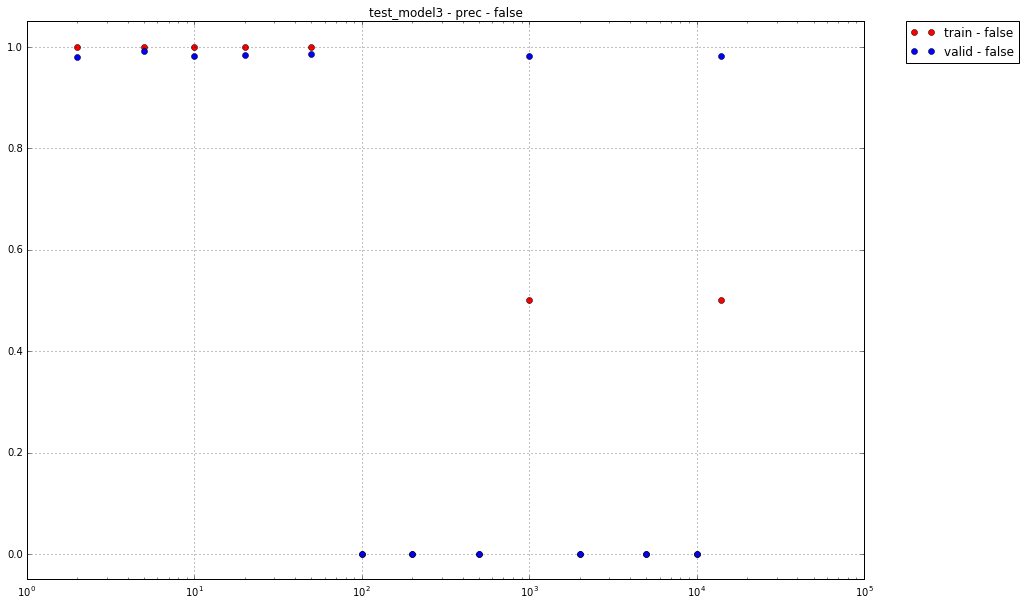

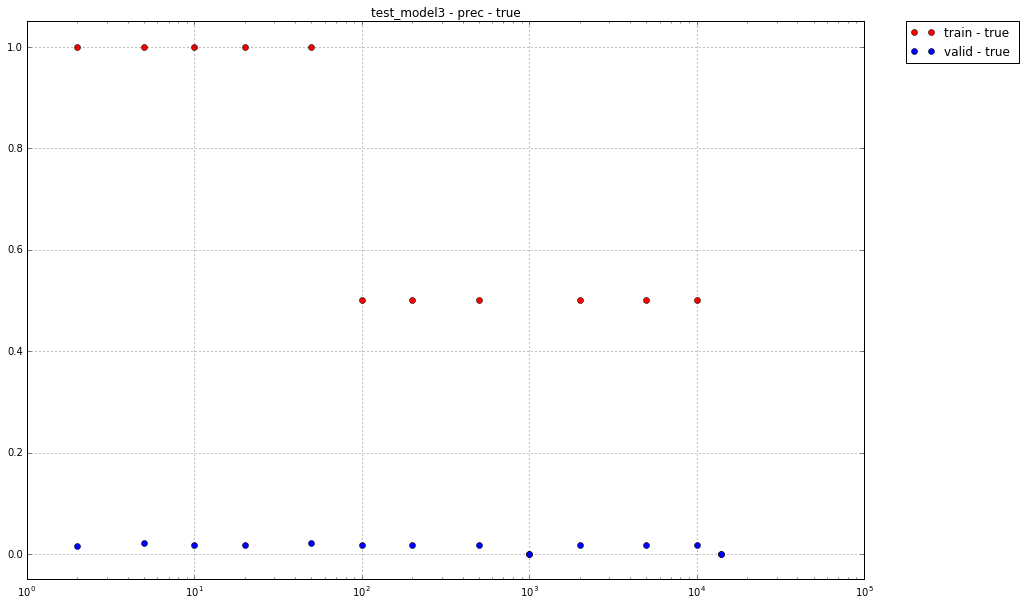

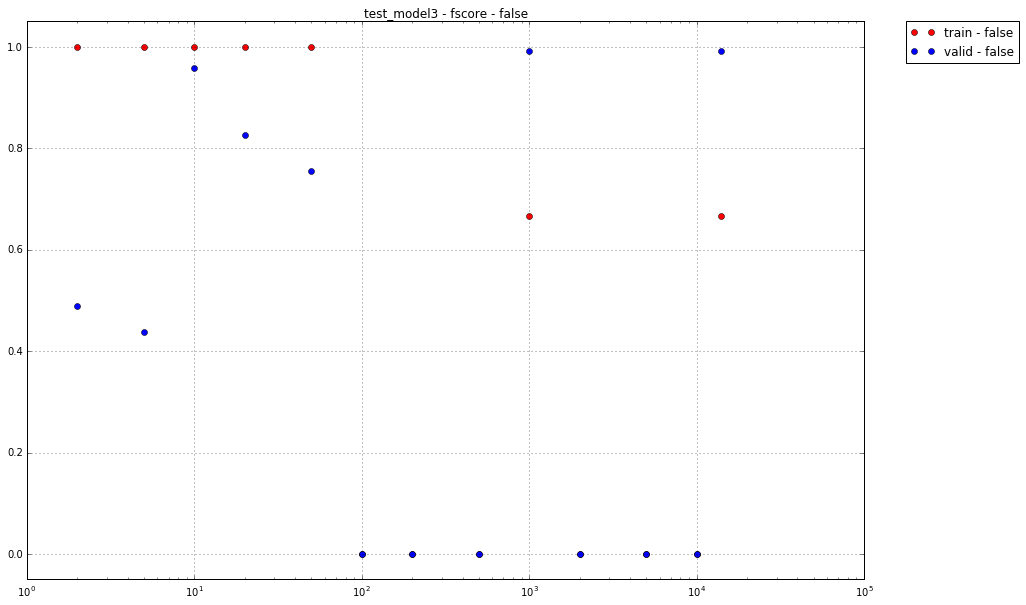

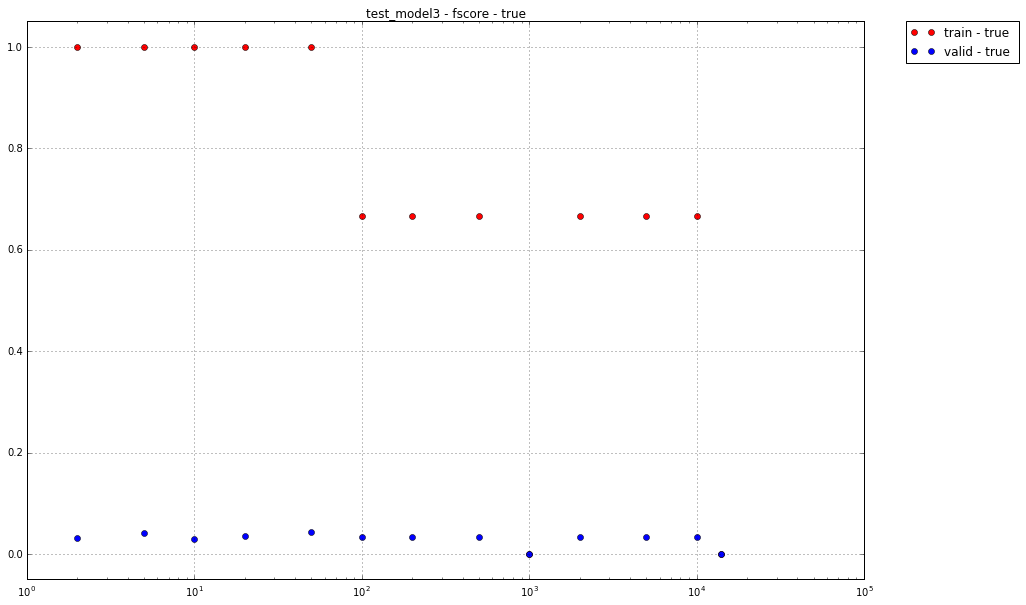

In [7]:
display(curves, "test_model3",chan=10)

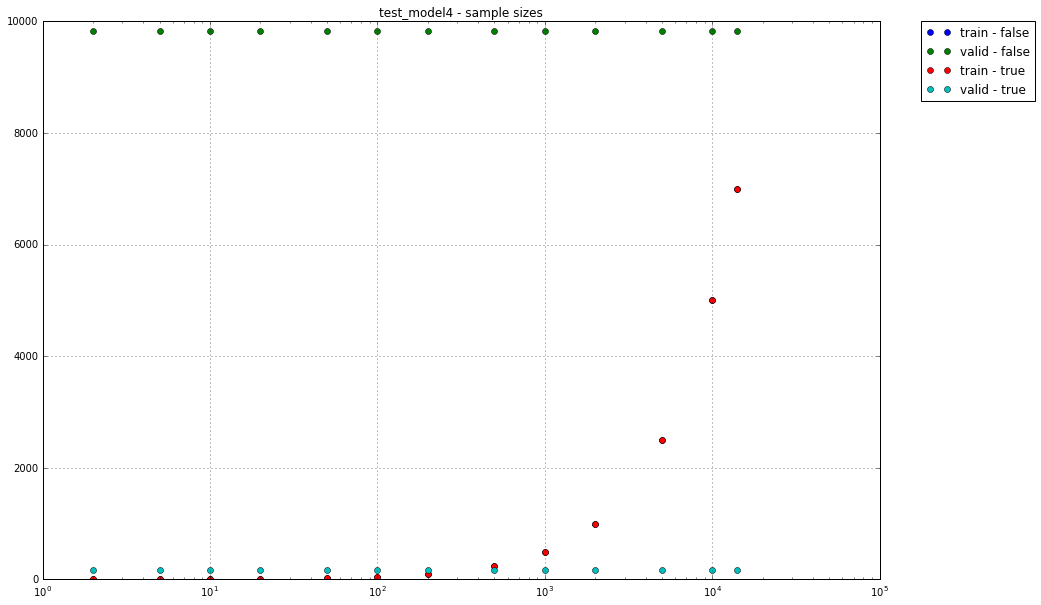

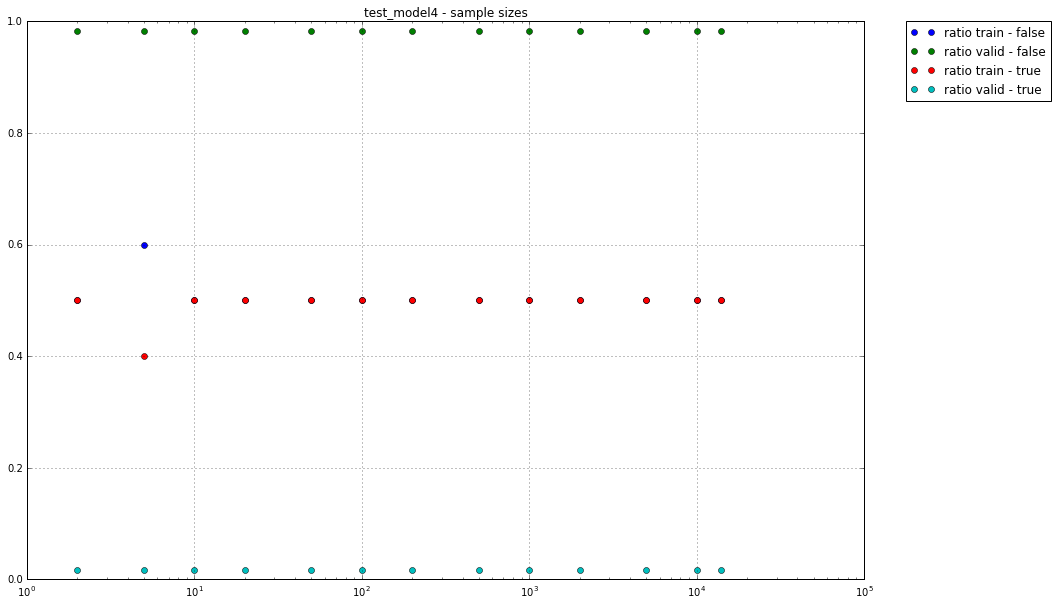

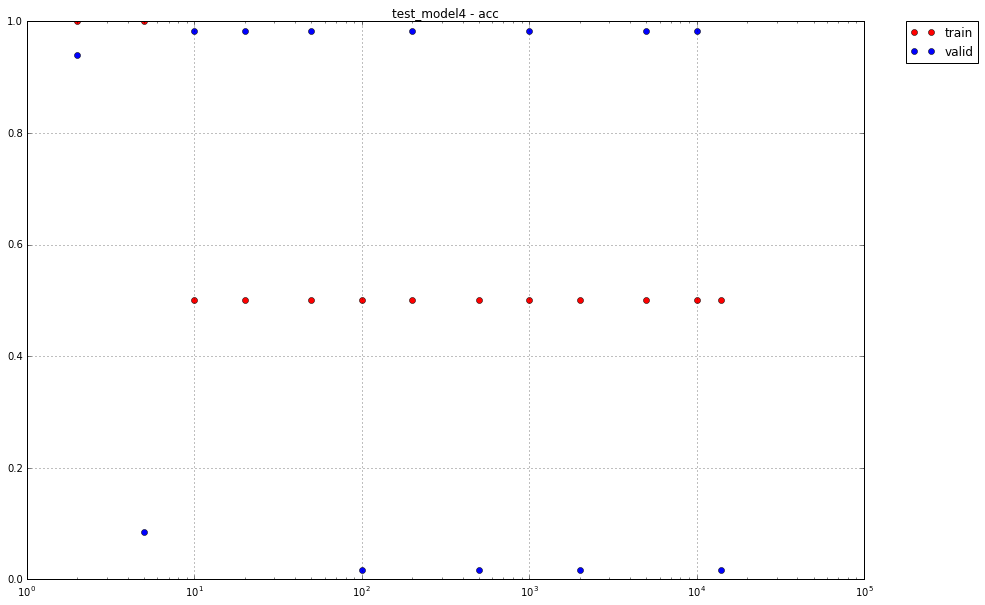

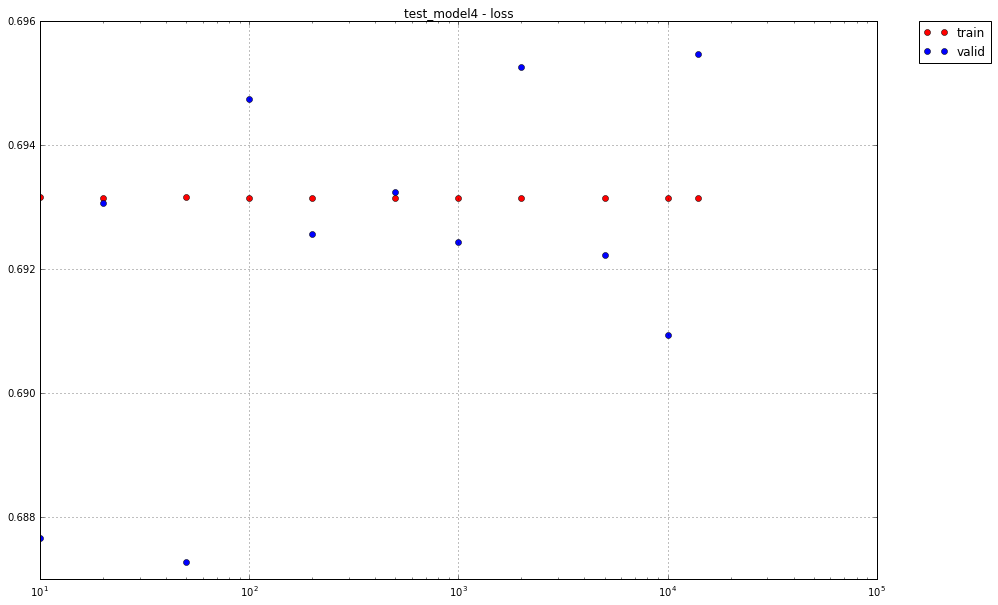

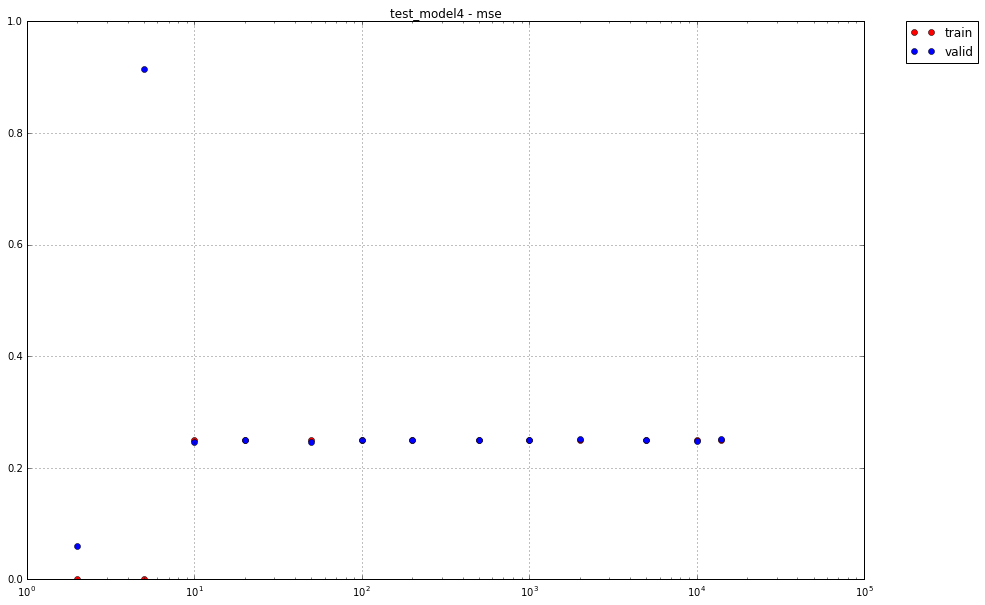

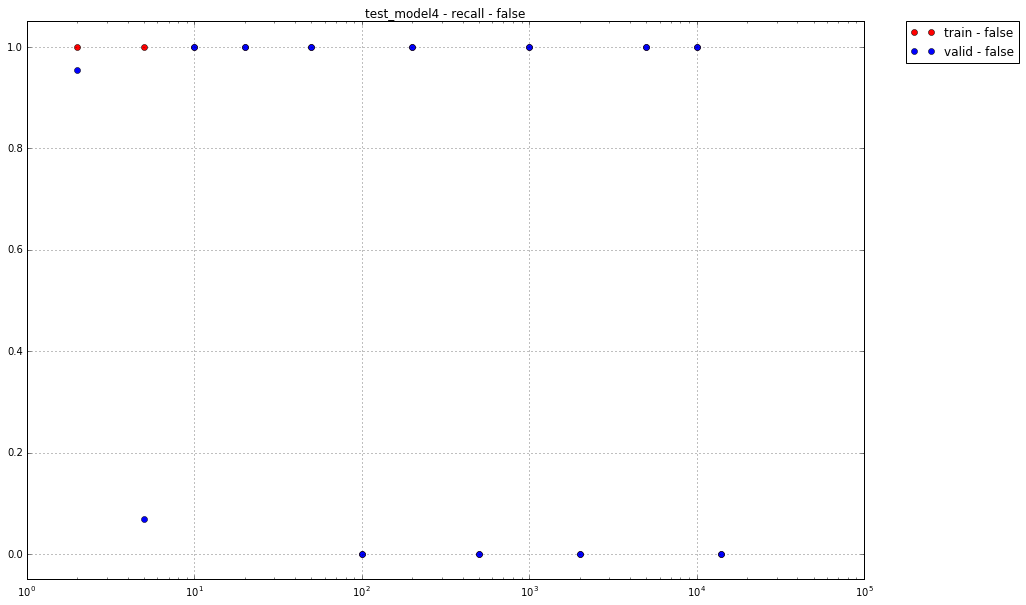

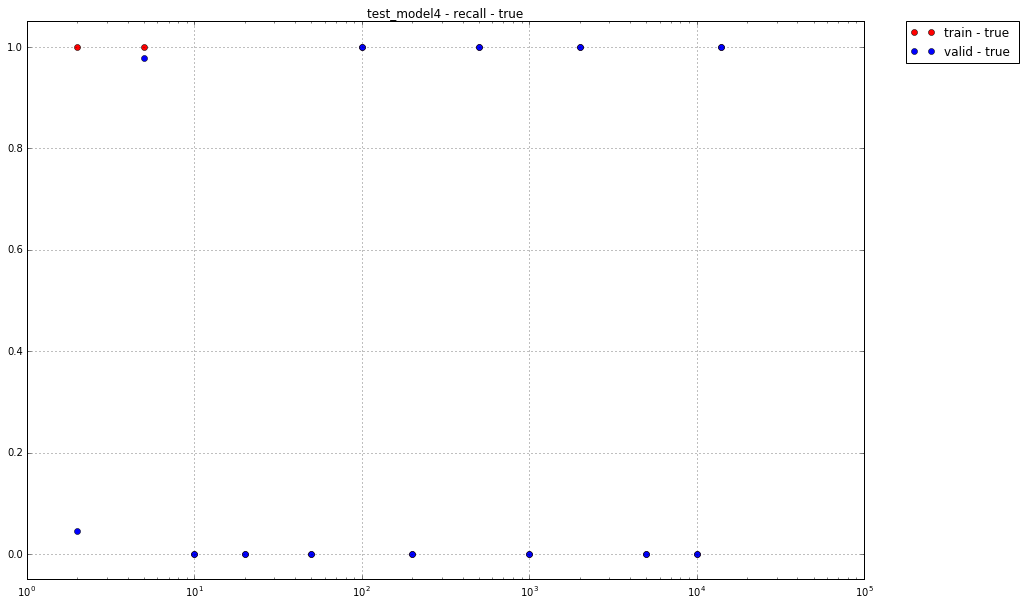

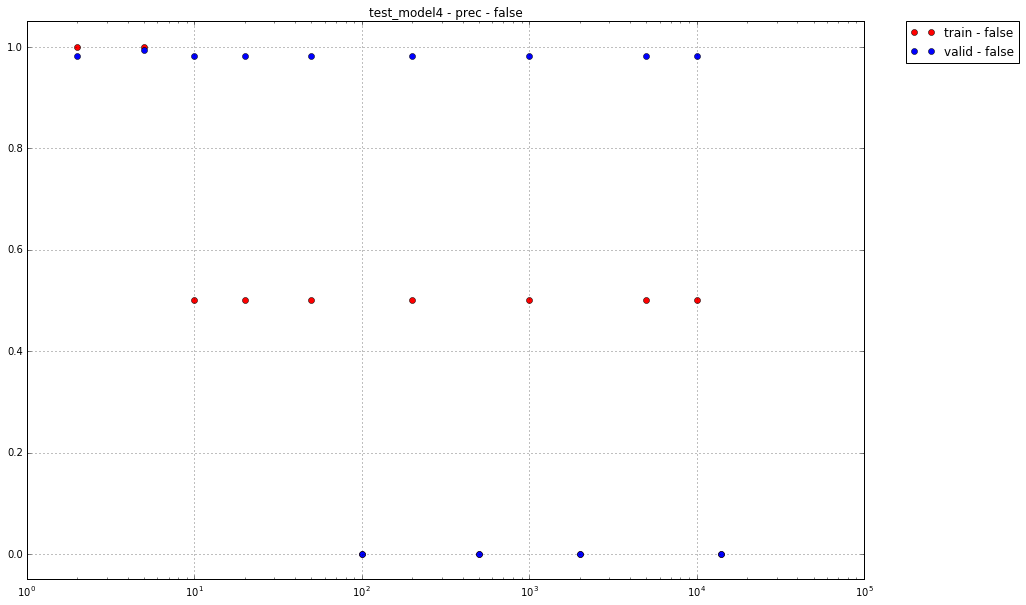

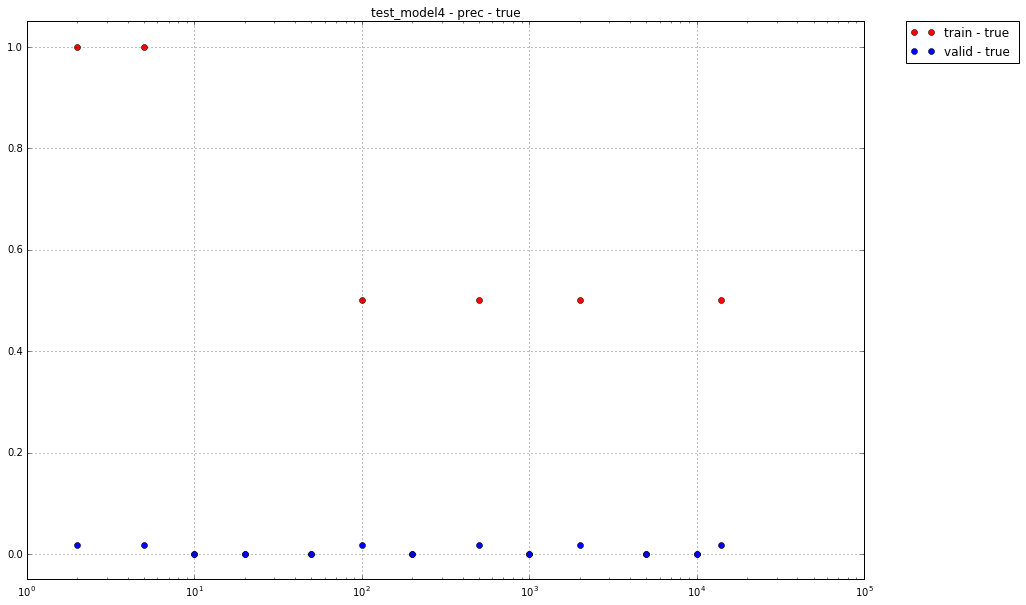

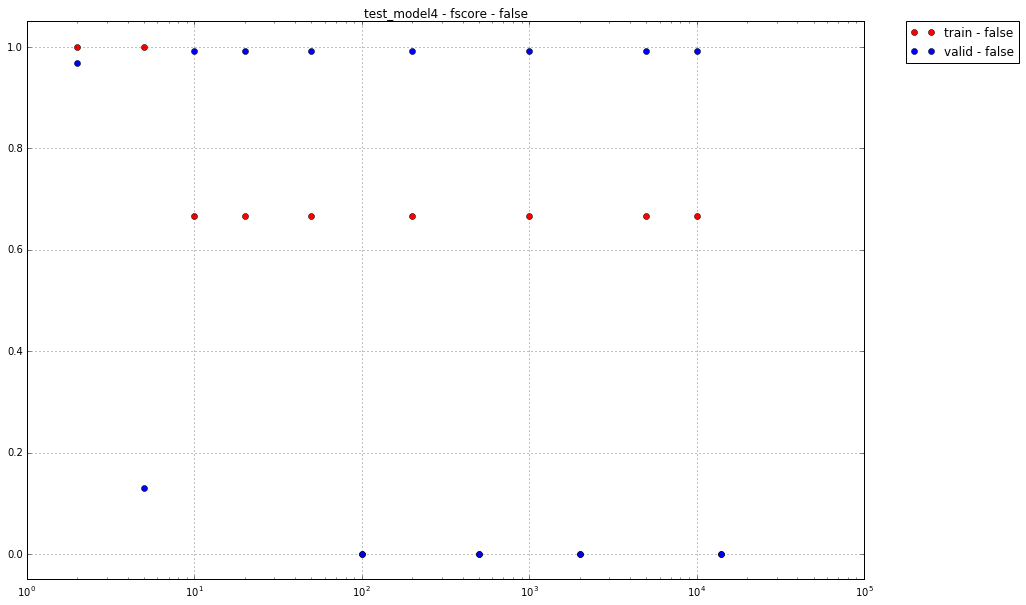

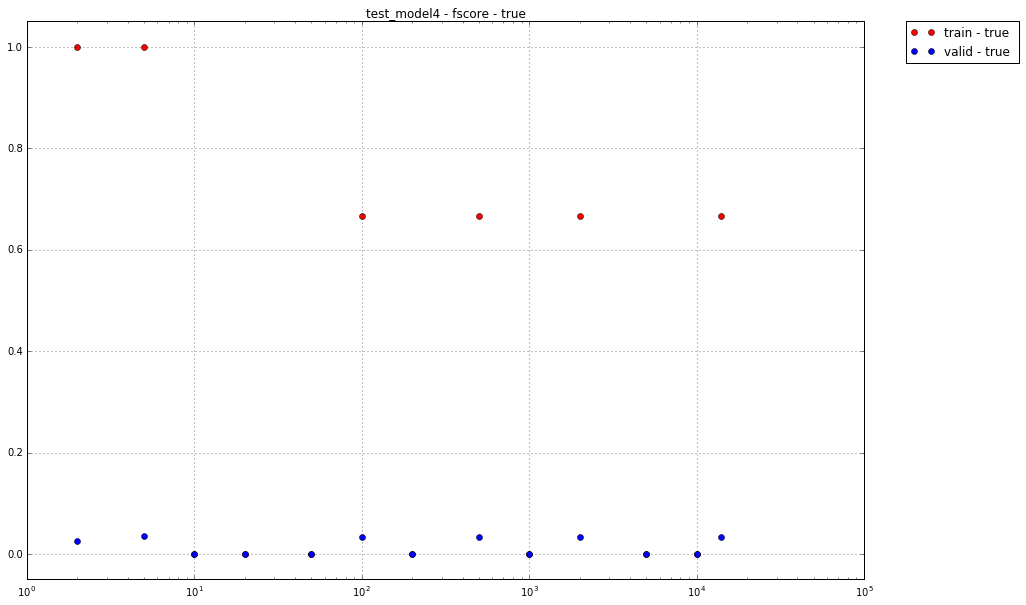

In [8]:
display(curves, "test_model4",chan=10)

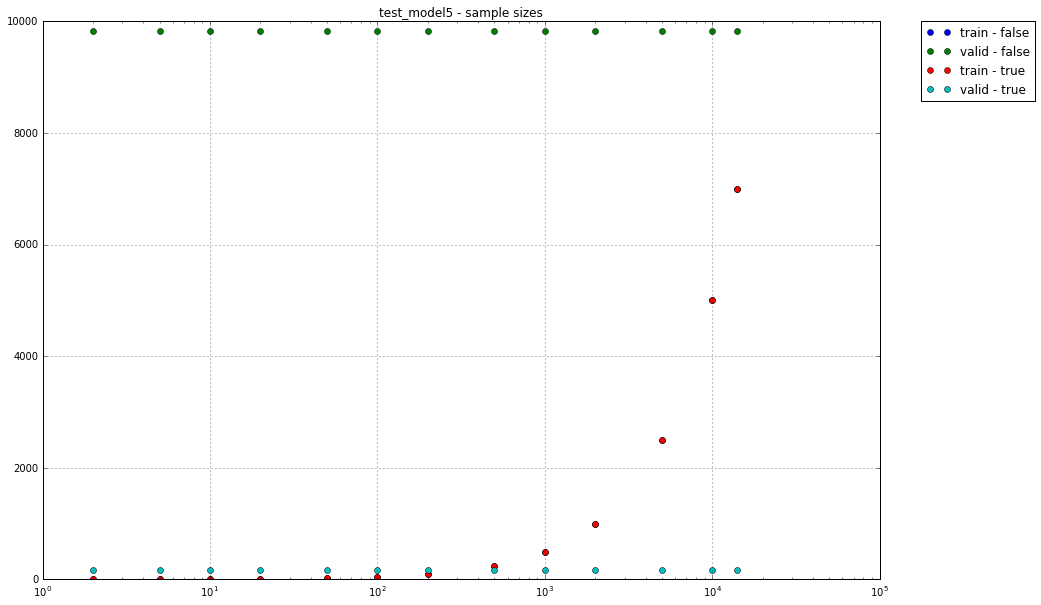

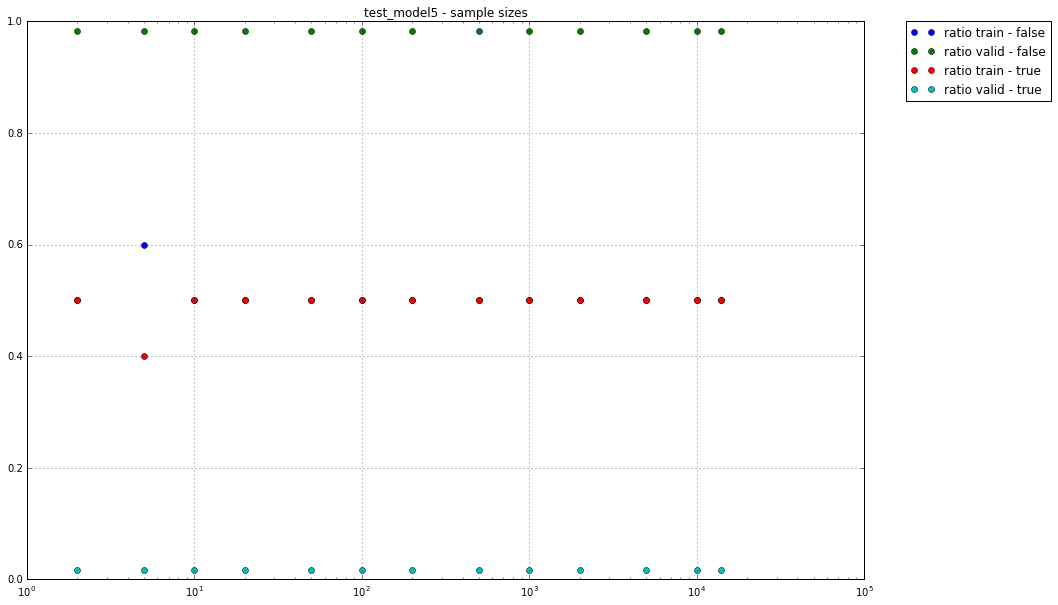

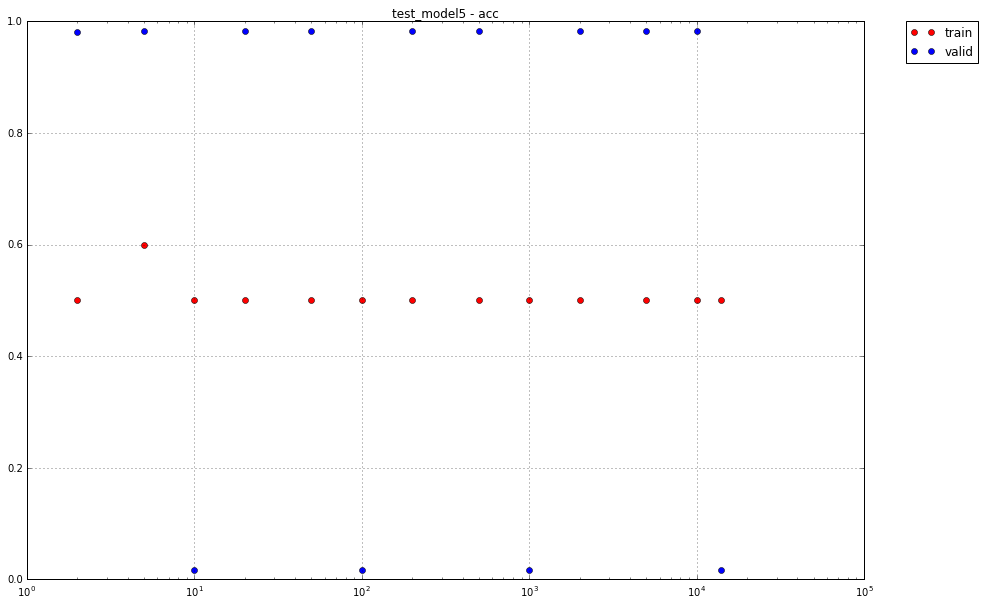

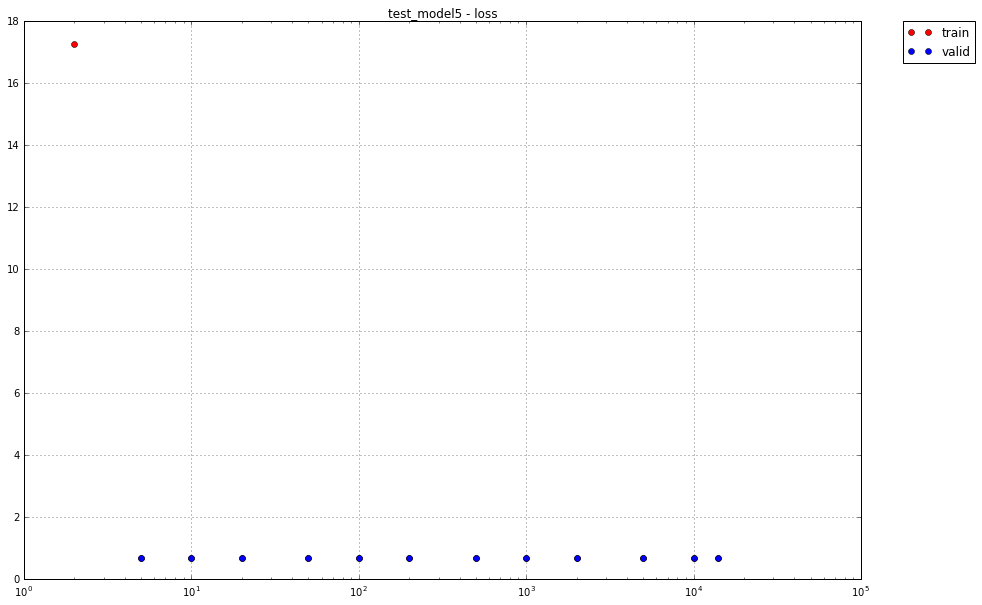

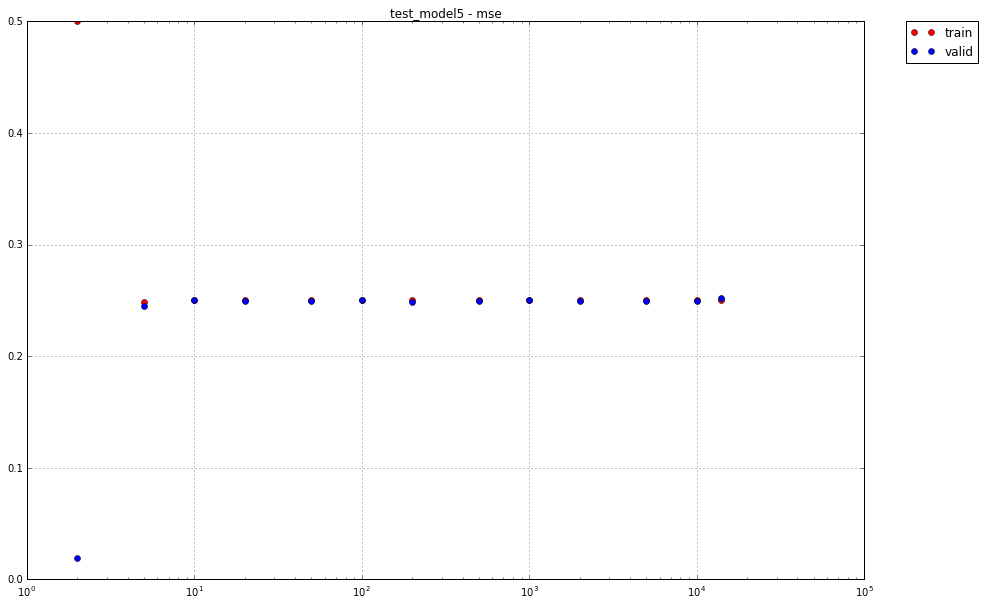

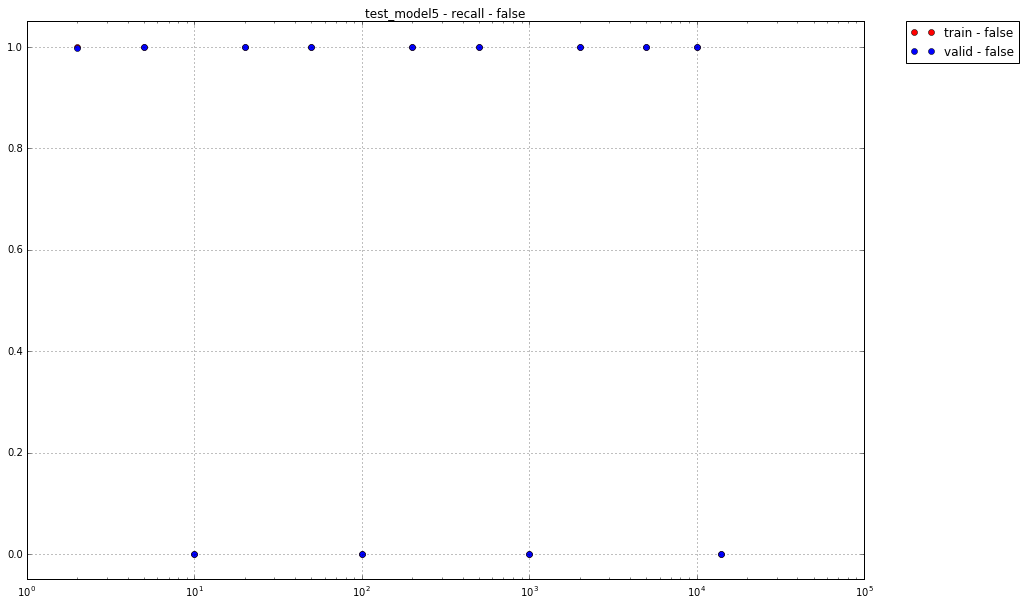

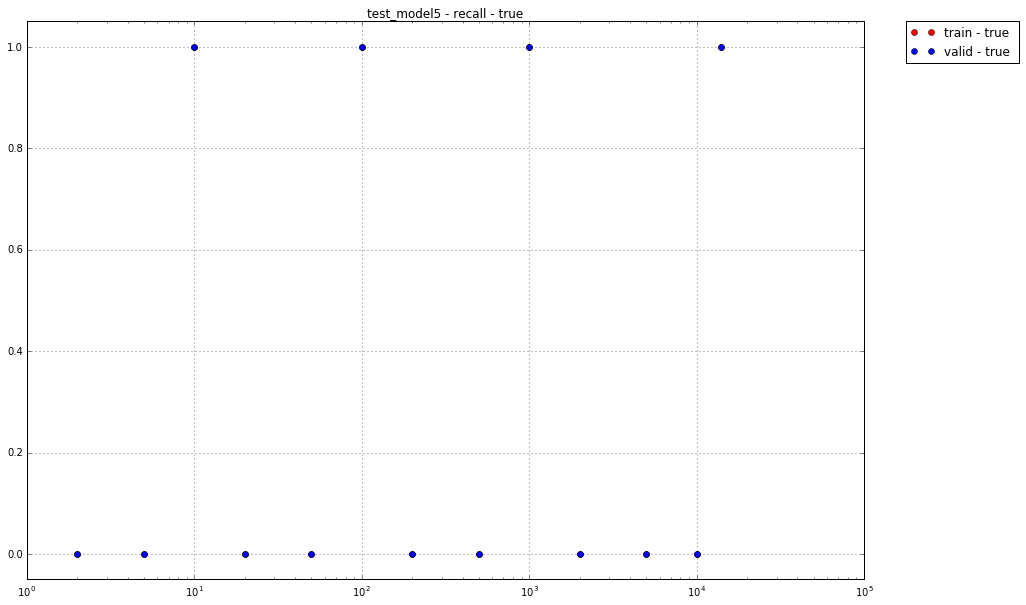

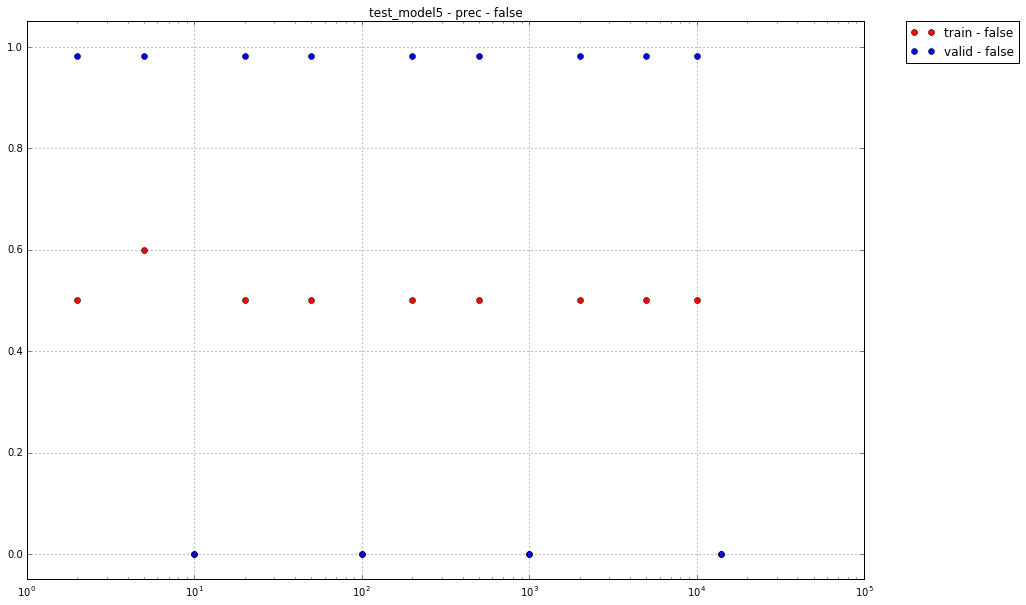

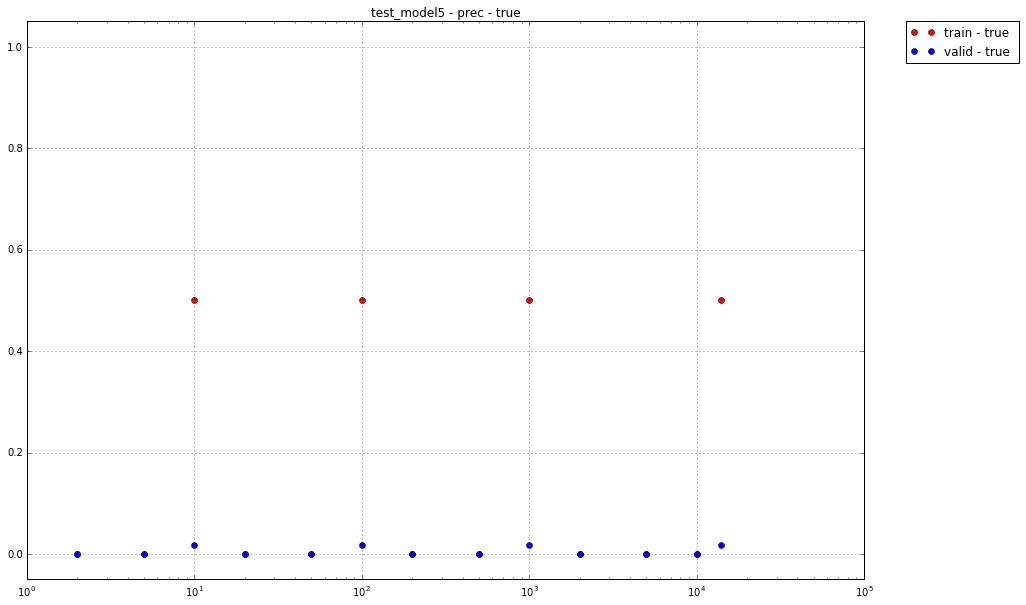

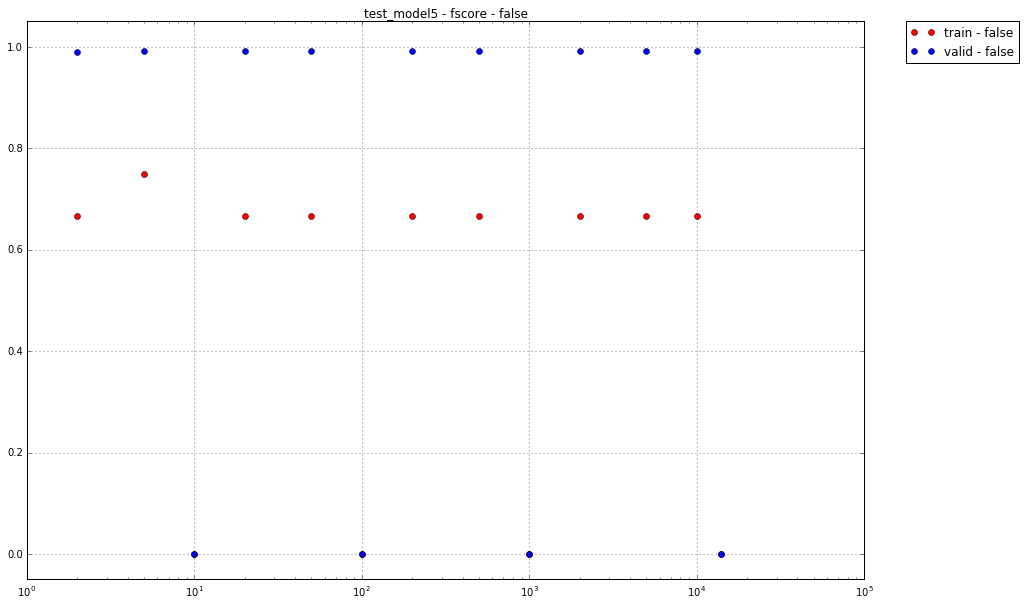

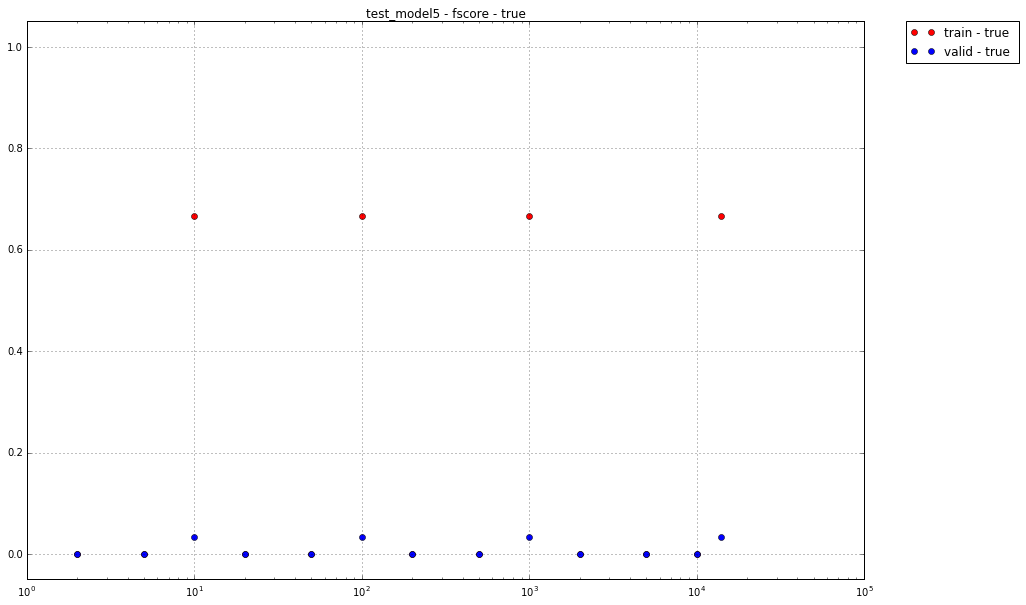

In [9]:
display(curves, "test_model5",chan=10)

In [10]:
# this is annoying as hell...
scurves = curves.sort_values(by="valid.acc", ascending=False)

# 1. a random guess/all te/all false model will output 0.5 for the training or 
#     the class balance ratio for the validation(because its not rebalanced)

idx = scurves["train.acc"] < 0.52
print np.sum(idx), "/", idx.shape[0], " (", (float(np.sum(idx))/idx.shape[0]),  ")"

idx1 = idx
# 2. logic says that its very unlikely for a training set to perform worse than the validation set

idx = scurves["train.acc"] < scurves["valid.acc"]
print np.sum(idx), "/", idx.shape[0], " (", (float(np.sum(idx))/idx.shape[0]),  ")"

idx2 = idx
idx = idx1 | idx2

print np.sum(idx), "/", idx.shape[0], " (", (float(np.sum(idx))/idx.shape[0]),  ")"

valid_idx = ~idx

330 / 702  ( 0.470085470085 )
196 / 702  ( 0.279202279202 )
360 / 702  ( 0.512820512821 )


In [11]:
# in short these results are *half* garabage.. 
# the head scratcher part is how the hell is it *half* not *all* ... the models work *sometimes* 

In [12]:
for i in range(10):
    chan = i + 1
    idx = valid_idx * (scurves["chan"] == chan)
    print ("#" * 100)
    print "best for", chan
    print scurves[idx][["tag","valid.acc","train.acc", "samples", "model.ident"]].to_string()

####################################################################################################
best for 1
                                          tag  valid.acc  train.acc  samples   model.ident
672  abf8dfa57c83641f1e2ce1804f675dfadfa447f4   0.939274   0.992000   5000.0   test_model3
67   33c94da9ceeaf4a061769e58bbc958545edf5baf   0.914983   0.999214  14000.0   test_model2
20   493bd69b90ba9c7c3bf7e64f2feedcf680b4b833   0.875984   0.998500  10000.0   test_model2
266  d04e54bd94f46b3c49c9af05ba1f8236cf4e182a   0.820873   1.000000      5.0   test_model4
28   d4f0d159b864cf66c96e698044869fcb89cbdebb   0.795301   1.000000      5.0   test_model3
96   ba14baccd90ab415ab70e786917e37c04e6e071f   0.794812   0.999400   5000.0   test_model2
75   c4576efddfef998eab707084063649bd555fd0ef   0.794141   1.000000      2.0  test_model3b
685  5b3a34e01515ec1624227231092caeb8d68b0ea7   0.792371   0.999000   1000.0   test_model2
191  bd8855e691c2ef683bd6fe27ddf7303fc8559501   0.787000   1.000000  